# Mobile Activity & Usage Prediction Dataset 

Topic:
Study and manipulation of data from different sources for class classification using 
artificial intelligence (AI) algorithms.

The data acquisition can be done using datasets available on the web or else acquired
through systems with sensors.

The dataset must have at least **5 features** (columns with different characteristics).

## Project Requirements 

<input type="checkbox"/> Analysis of Dataset Features.

<input type="checkbox"/> Preparation of the data to put into an AI model.

<input type="checkbox"/> Study of the most suitable Ai model for the chosen dataset.

<input type="checkbox"/> Application of the selected Ai model to the dataset with and without the application of PCA/LDA techniques.

<input type="checkbox"/> Analysis of the Ai model training (Confusion matrix, learning curves, etc...).

<input type="checkbox"/> Study of the most important features of the dataset (feature importance) to improve the accuracy of the Ai model.

<input type="checkbox"/> Feature Importance self Obtained.

## Valorization of the Process

<input type="checkbox"/>  Hardware for acquiring the dataset.

<input type="checkbox"/>  Application of data combination techniques (example: data alignment, 
downsampling/upsampling, etc...).

<input type="checkbox"/>  Application of data quality improvement techniques (example: filters).

<input type="checkbox"/>  Extraction of additional features from the initial data (example: FFT/MFCC from an audio window 
from an audio window, etc...).

<input type="checkbox"/>  Other approaches...

## Brief Description of the Work

The following code analyses two datasets collected from 6 different cell phones using the as a collection method Home Assistant resources to gather data from 51 different features with the objective of test and develop skills in the field of data fusion according with the project defined by the professor V. Oliveira (voliveira@ipca.pt)

The authors of the following project and respective data are: 

@fandrepm18
@JoaquinDillen
@nunof98




# Load Dataset

In [1]:
import pandas as pd

filename = 'reclassifying_features/dataset_v1.csv'

# load dataset and set time column as index
df = pd.read_csv(f'datasets/{filename}').set_index('time')
df

,app_memory,battery_power,last_update_trigger,light_sensor,active_notification_count,pressure_sensor,battery_temperature,screen_brightness,device_locked,wifi_link_speed,...,charger_type,battery_health,ble_transmitter,do_not_disturb_sensor,screen_off_timeout,speakerphone,mobile_data,wifi_state,power_save,device_id
time,,,,,,,,,,,,,,,,,,,,,
2023-01-17 00:15:00,0.00000,0.000000,SensorWorker,0.000000,0.00,0.0,0.00,0.0,off,0.0,...,none,good,transmitting,unavaliable,unavaliable,off,off,off,off,SMG960F
2023-01-17 00:30:00,0.00000,0.000000,SensorWorker,0.000000,0.00,0.0,22.20,0.0,off,0.0,...,none,good,transmitting,unavaliable,unavaliable,off,off,off,off,SMG960F
2023-01-17 00:45:00,0.00000,0.000000,SensorWorker,0.000000,0.00,0.0,21.80,0.0,off,0.0,...,none,good,transmitting,unavaliable,unavaliable,off,off,off,off,SMG960F
2023-01-17 01:00:00,0.00000,0.000000,SensorWorker,0.000000,0.00,0.0,21.90,0.0,off,0.0,...,none,good,transmitting,unavaliable,unavaliable,off,off,off,off,SMG960F
2023-01-17 01:15:00,0.00000,0.000000,SensorWorker,0.000000,0.00,0.0,21.60,0.0,off,0.0,...,none,good,transmitting,unavaliable,unavaliable,off,off,off,off,SMG960F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-26 19:00:00,0.01175,-0.002500,android.intent.action.SCREEN_ON,21.333333,9.00,0.0,18.25,0.0,off,341.0,...,none,good,Transmitting,unavaliable,unavaliable,on,off,off,off,SMA528B
2023-01-26 19:15:00,0.01450,0.000000,android.net.wifi.STATE_CHANGE,13.500000,10.00,0.0,17.60,0.0,off,341.0,...,none,good,Transmitting,unavaliable,unavaliable,on,off,off,off,SMA528B
2023-01-26 19:30:00,0.01200,-0.003333,android.intent.action.PHONE_STATE,0.666667,11.75,0.0,17.15,0.0,off,351.0,...,none,good,Transmitting,unavaliable,unavaliable,on,off,off,off,SMA528B


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5664 entries, 2023-01-17 00:15:00 to 2023-01-26 20:00:00
Data columns (total 49 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   app_memory                  5664 non-null   float64
 1   battery_power               5664 non-null   float64
 2   last_update_trigger         5664 non-null   object 
 3   light_sensor                5664 non-null   float64
 4   active_notification_count   5664 non-null   float64
 5   pressure_sensor             5664 non-null   float64
 6   battery_temperature         5664 non-null   float64
 7   screen_brightness           5664 non-null   float64
 8   device_locked               5664 non-null   object 
 9   wifi_link_speed             5664 non-null   float64
 10  interactive                 5664 non-null   object 
 11  doze_mode                   5664 non-null   object 
 12  battery_level               5664 non-null   float64
 13  wifi_

app_memory                    0
battery_power                 0
last_update_trigger           0
light_sensor                  0
active_notification_count     0
pressure_sensor               0
battery_temperature           0
screen_brightness             0
device_locked                 0
wifi_link_speed               0
interactive                   0
doze_mode                     0
battery_level                 0
wifi_signal_strength          0
total_tx_gb                   0
wifi_frequency                0
app_rx_gb                     0
app_tx_gb                     0
last_used_app                 0
total_rx_gb                   0
detected_activity             0
proximity_sensor              0
steps_sensor                  0
headphones                    0
volume_level_call             0
volume_level_music            0
volume_level_accessibility    0
music_active                  0
wifi_connection               0
network_type                  0
mobile_rx_gb                  0
mobile_t

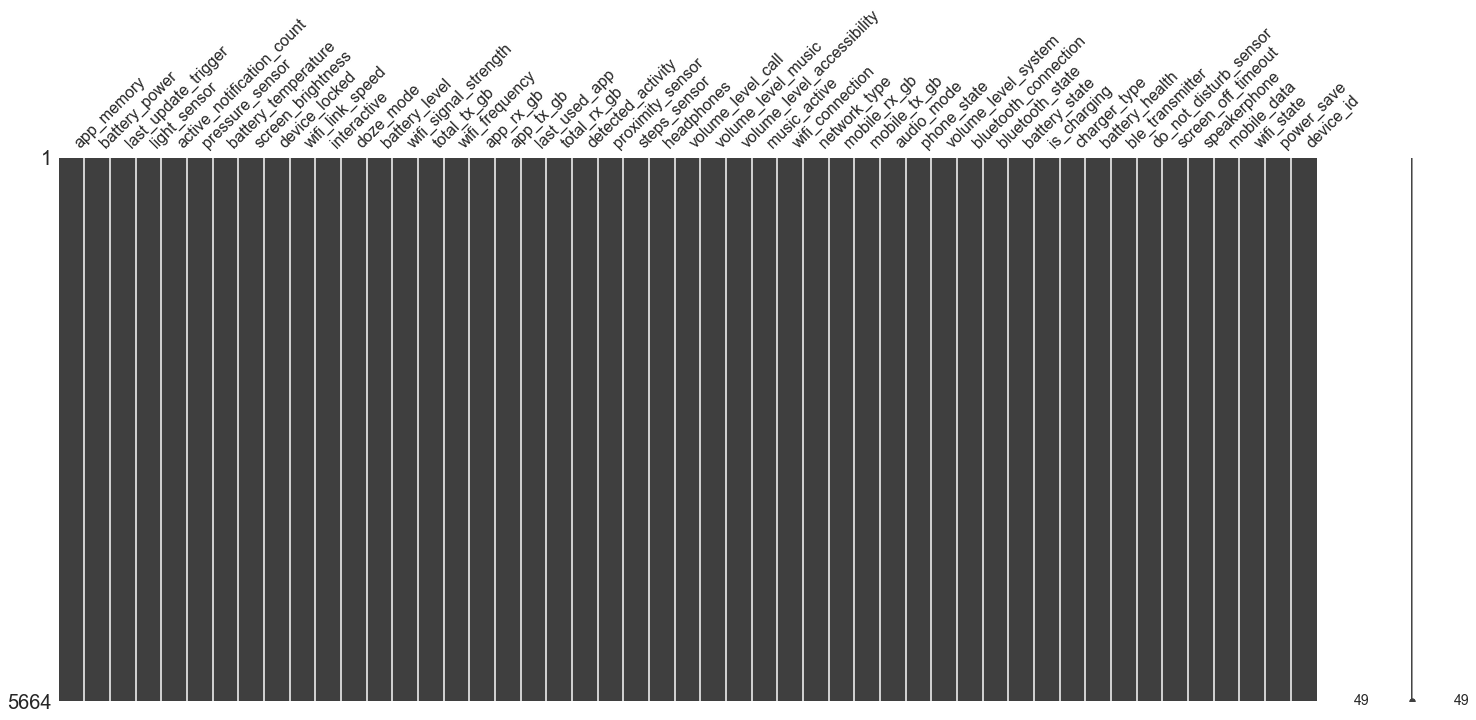

In [3]:
import missingno as msno

# check for missing values
msno.matrix(df)
df.isnull().sum()

# Analysis of dataset features
Analyses the statistical information about each variable.

In [4]:
df.describe()

,app_memory,battery_power,light_sensor,active_notification_count,pressure_sensor,battery_temperature,screen_brightness,wifi_link_speed,battery_level,wifi_signal_strength,...,total_rx_gb,proximity_sensor,steps_sensor,volume_level_call,volume_level_music,volume_level_accessibility,mobile_rx_gb,mobile_tx_gb,volume_level_system,bluetooth_connection
count,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,...,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000
mean,0.012281,-0.082329,65.701824,2.571404,212.029130,19.840668,22.161800,115.261931,54.308467,-24.095224,...,12.011089,2.288899,21117.117435,2.708451,4.004726,3.812421,0.671618,0.035222,0.962688,0.332182
std,0.012065,0.414615,429.619220,3.731159,412.718471,8.586159,36.712059,160.083058,32.112288,29.331055,...,15.779058,2.344625,30595.807787,3.046022,5.132431,4.328333,1.292121,0.068907,2.355609,0.457608
min,0.000000,-3.010000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-89.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,18.400000,0.000000,0.000000,29.000000,-54.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.012000,0.000000,0.000000,1.000000,0.000000,21.400000,0.000000,0.000000,58.000000,-1.000000,...,3.171000,2.500000,7169.500000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,0.021000,0.000000,21.714286,3.800000,0.000000,25.050000,27.000000,234.000000,81.000000,0.000000,...,18.885000,5.000000,44298.000000,6.000000,7.000000,7.333333,0.726000,0.039000,0.000000,0.500000
max,0.064000,5.480000,15635.727273,22.500000,1029.650000,41.300000,237.500000,680.200000,100.000000,0.000000,...,52.314000,8.000000,102229.000000,8.000000,24.000000,15.000000,5.681000,0.340500,14.000000,2.000000


C:\Users\lemos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='last_used_app', ylabel='count'>

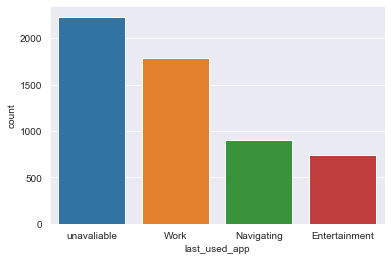

In [5]:
import seaborn as sns

sns.countplot(df['last_used_app'])

The samples don't have the same size. So it's advised to use stratify when splitting the data.

In [6]:
print('% of classes')
round((df['last_used_app'].value_counts() / df.shape[0]) * 100, 2)

% of classes


unavaliable      39.39
Work             31.60
Navigating       15.93
Entertainment    13.08
Name: last_used_app, dtype: float64

C:\Users\lemos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='device_id', ylabel='count'>

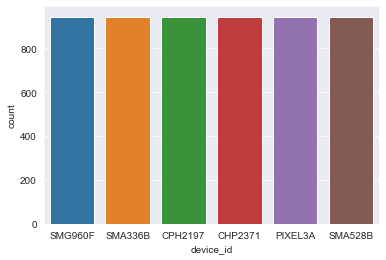

In [7]:
sns.countplot(df['device_id'])

In [8]:
print('% of phones')
round((df['device_id'].value_counts() / df.shape[0]) * 100, 2)

% of phones


SMG960F    16.67
SMA336B    16.67
CPH2197    16.67
CHP2371    16.67
PIXEL3A    16.67
SMA528B    16.67
Name: device_id, dtype: float64

<AxesSubplot:title={'center':'Total TX distribution'}, ylabel='Density'>

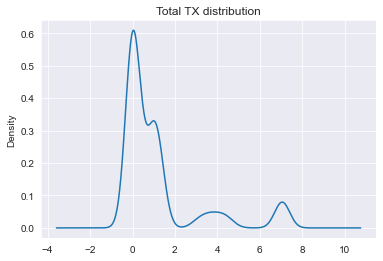

In [9]:
from matplotlib import pyplot as plt

plt.title('Total TX distribution')
df['total_tx_gb'].plot(kind='kde')

<AxesSubplot:title={'center':'Total RX distribution'}, ylabel='Density'>

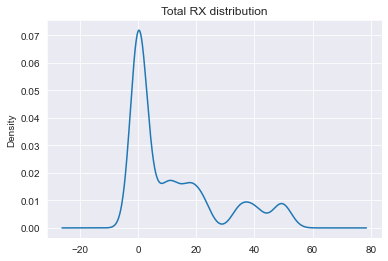

In [10]:
plt.title('Total RX distribution')
df['total_rx_gb'].plot(kind='kde')

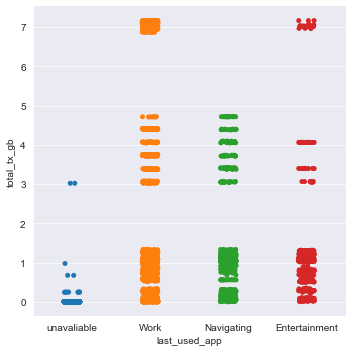

In [11]:
sns.catplot(data=df, x='last_used_app', y='total_tx_gb')

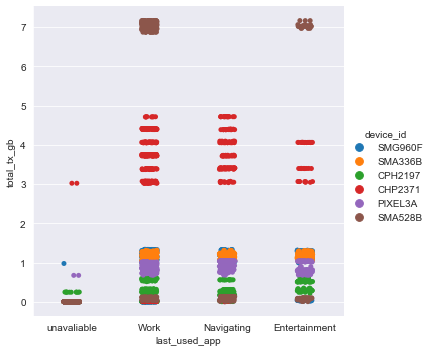

In [12]:
sns.catplot(data=df, x='last_used_app', y='total_tx_gb', hue='device_id')

<AxesSubplot:title={'center':'Update Trigger'}>

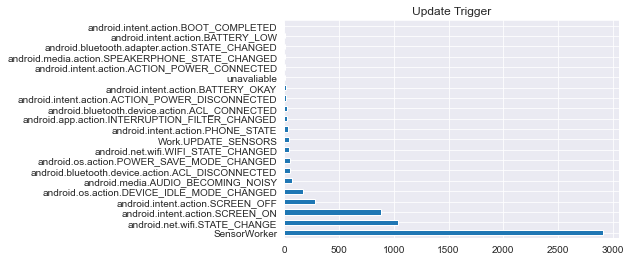

In [13]:
df['last_update_trigger'].value_counts().plot(kind='barh', title='Update Trigger')

## Encode categorical features

In [14]:
import category_encoders as ce

# select categorical columns
cat_cols = df.select_dtypes(include="object").columns.tolist()
# cat_cols.remove('last_used_app')

encoder = ce.OrdinalEncoder(cols=cat_cols)
df = encoder.fit_transform(df)
df

,app_memory,battery_power,last_update_trigger,light_sensor,active_notification_count,pressure_sensor,battery_temperature,screen_brightness,device_locked,wifi_link_speed,...,charger_type,battery_health,ble_transmitter,do_not_disturb_sensor,screen_off_timeout,speakerphone,mobile_data,wifi_state,power_save,device_id
time,,,,,,,,,,,,,,,,,,,,,
2023-01-17 00:15:00,0.00000,0.000000,1,0.000000,0.00,0.0,0.00,0.0,1,0.0,...,1,1,1,1,1,1,1,1,1,1
2023-01-17 00:30:00,0.00000,0.000000,1,0.000000,0.00,0.0,22.20,0.0,1,0.0,...,1,1,1,1,1,1,1,1,1,1
2023-01-17 00:45:00,0.00000,0.000000,1,0.000000,0.00,0.0,21.80,0.0,1,0.0,...,1,1,1,1,1,1,1,1,1,1
2023-01-17 01:00:00,0.00000,0.000000,1,0.000000,0.00,0.0,21.90,0.0,1,0.0,...,1,1,1,1,1,1,1,1,1,1
2023-01-17 01:15:00,0.00000,0.000000,1,0.000000,0.00,0.0,21.60,0.0,1,0.0,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-26 19:00:00,0.01175,-0.002500,3,21.333333,9.00,0.0,18.25,0.0,1,341.0,...,1,1,3,1,1,2,1,1,1,6
2023-01-26 19:15:00,0.01450,0.000000,10,13.500000,10.00,0.0,17.60,0.0,1,341.0,...,1,1,3,1,1,2,1,1,1,6
2023-01-26 19:30:00,0.01200,-0.003333,11,0.666667,11.75,0.0,17.15,0.0,1,351.0,...,1,1,3,1,1,2,1,1,1,6


In [15]:
df.describe()

,app_memory,battery_power,last_update_trigger,light_sensor,active_notification_count,pressure_sensor,battery_temperature,screen_brightness,device_locked,wifi_link_speed,...,charger_type,battery_health,ble_transmitter,do_not_disturb_sensor,screen_off_timeout,speakerphone,mobile_data,wifi_state,power_save,device_id
count,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,...,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000
mean,0.012281,-0.082329,4.059322,65.701824,2.571404,212.029130,19.840668,22.161800,1.324153,115.261931,...,1.432203,1.424082,2.014301,1.099047,1.099223,1.576977,1.618997,1.517655,1.168785,3.500000
std,0.012065,0.414615,4.191641,429.619220,3.731159,412.718471,8.586159,36.712059,0.734467,160.083058,...,0.607209,0.494246,1.217467,0.317658,0.389296,0.742784,0.863222,0.726900,0.463128,1.707976
min,0.000000,-3.010000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,18.400000,0.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
50%,0.012000,0.000000,1.000000,0.000000,1.000000,0.000000,21.400000,0.000000,1.000000,0.000000,...,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.500000
75%,0.021000,0.000000,7.000000,21.714286,3.800000,0.000000,25.050000,27.000000,1.000000,234.000000,...,2.000000,2.000000,3.000000,1.000000,1.000000,2.000000,3.000000,2.000000,1.000000,5.000000
max,0.064000,5.480000,21.000000,15635.727273,22.500000,1029.650000,41.300000,237.500000,3.000000,680.200000,...,4.000000,2.000000,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,6.000000


In [16]:
# drop irrelevant columns (std < 1)
df = df.drop(df.std()[df.std() < 1.0].index.values, axis=1)
df

,last_update_trigger,light_sensor,active_notification_count,pressure_sensor,battery_temperature,screen_brightness,wifi_link_speed,battery_level,wifi_signal_strength,total_tx_gb,...,steps_sensor,volume_level_call,volume_level_music,volume_level_accessibility,wifi_connection,mobile_rx_gb,volume_level_system,battery_state,ble_transmitter,device_id
time,,,,,,,,,,,,,,,,,,,,,
2023-01-17 00:15:00,1,0.000000,0.00,0.0,0.00,0.0,0.0,74.0,0.0,0.000,...,0.0,0.0,0.0,0.0,1,0.0,0.0,1,1,1
2023-01-17 00:30:00,1,0.000000,0.00,0.0,22.20,0.0,0.0,73.0,0.0,0.000,...,0.0,0.0,0.0,0.0,1,0.0,0.0,1,1,1
2023-01-17 00:45:00,1,0.000000,0.00,0.0,21.80,0.0,0.0,72.0,0.0,0.000,...,0.0,0.0,0.0,0.0,1,0.0,0.0,1,1,1
2023-01-17 01:00:00,1,0.000000,0.00,0.0,21.90,0.0,0.0,71.0,0.0,0.000,...,0.0,0.0,0.0,0.0,1,0.0,0.0,1,1,1
2023-01-17 01:15:00,1,0.000000,0.00,0.0,21.60,0.0,0.0,70.0,0.0,0.000,...,0.0,0.0,0.0,0.0,1,0.0,0.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-26 19:00:00,3,21.333333,9.00,0.0,18.25,0.0,341.0,76.0,-58.0,0.135,...,586.0,7.5,3.0,4.0,1,0.0,3.0,1,3,6
2023-01-26 19:15:00,10,13.500000,10.00,0.0,17.60,0.0,341.0,76.0,-58.0,0.135,...,586.0,7.5,3.0,4.0,1,0.0,3.0,1,3,6
2023-01-26 19:30:00,11,0.666667,11.75,0.0,17.15,0.0,351.0,75.0,-58.0,0.135,...,586.0,7.5,3.0,4.0,1,0.0,3.0,1,3,6


# Correlation Matrix
Analyses the relationship between features

Text(0.5, 1.0, 'Correlation between variables')

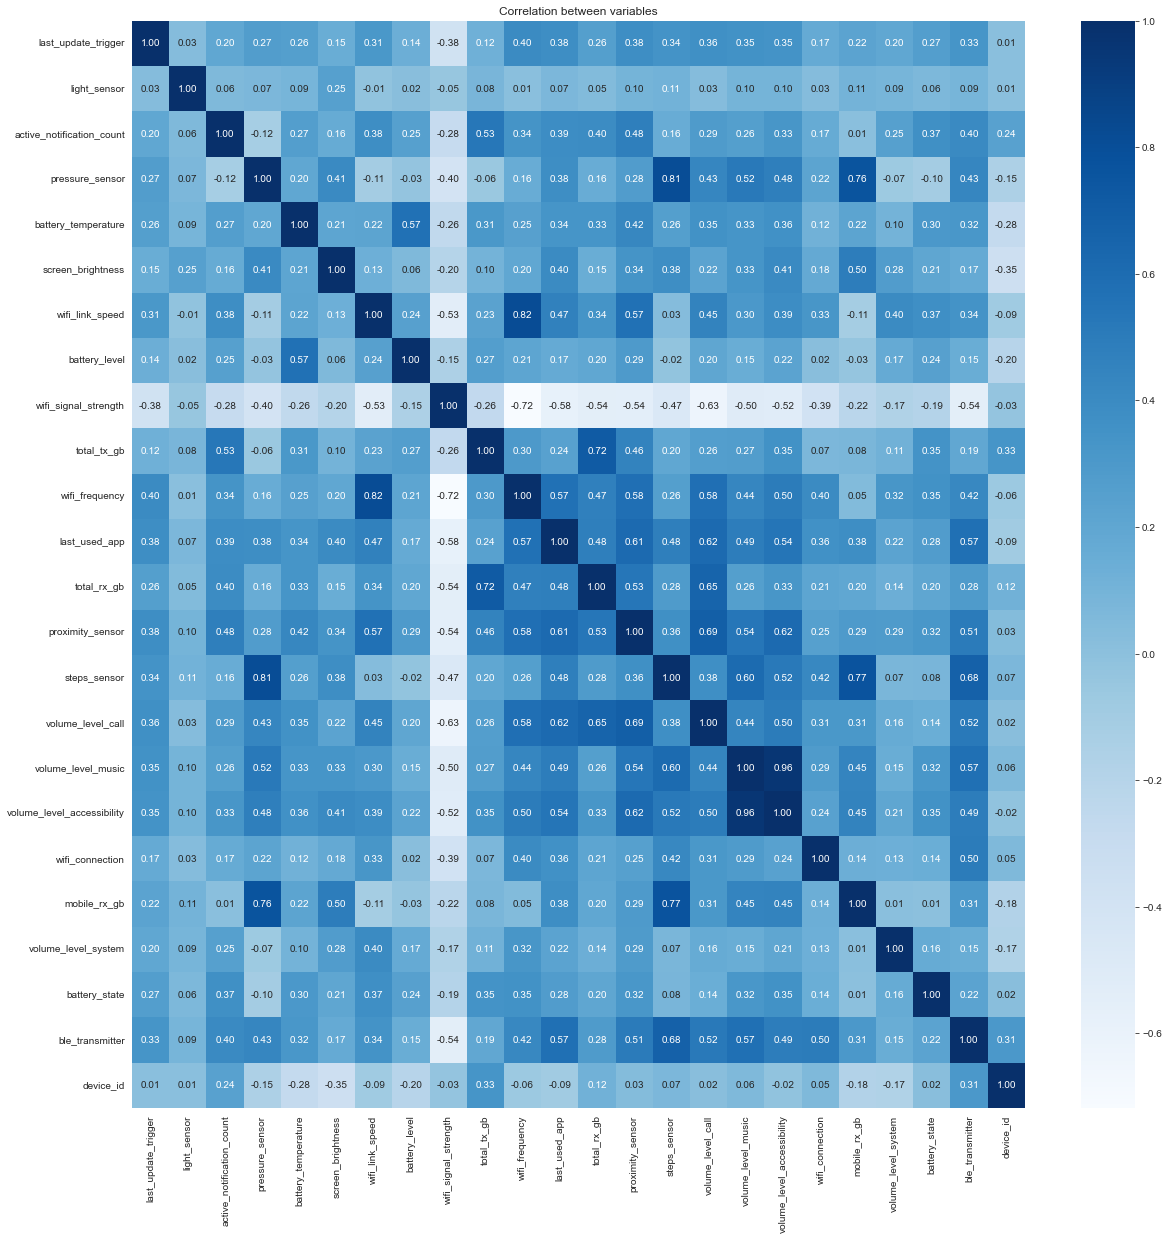

In [17]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Blues')
plt.title('Correlation between variables')

# Get features and labels

In [18]:
# get features
X = df.drop(['last_used_app'], axis=1)
X

,last_update_trigger,light_sensor,active_notification_count,pressure_sensor,battery_temperature,screen_brightness,wifi_link_speed,battery_level,wifi_signal_strength,total_tx_gb,...,steps_sensor,volume_level_call,volume_level_music,volume_level_accessibility,wifi_connection,mobile_rx_gb,volume_level_system,battery_state,ble_transmitter,device_id
time,,,,,,,,,,,,,,,,,,,,,
2023-01-17 00:15:00,1,0.000000,0.00,0.0,0.00,0.0,0.0,74.0,0.0,0.000,...,0.0,0.0,0.0,0.0,1,0.0,0.0,1,1,1
2023-01-17 00:30:00,1,0.000000,0.00,0.0,22.20,0.0,0.0,73.0,0.0,0.000,...,0.0,0.0,0.0,0.0,1,0.0,0.0,1,1,1
2023-01-17 00:45:00,1,0.000000,0.00,0.0,21.80,0.0,0.0,72.0,0.0,0.000,...,0.0,0.0,0.0,0.0,1,0.0,0.0,1,1,1
2023-01-17 01:00:00,1,0.000000,0.00,0.0,21.90,0.0,0.0,71.0,0.0,0.000,...,0.0,0.0,0.0,0.0,1,0.0,0.0,1,1,1
2023-01-17 01:15:00,1,0.000000,0.00,0.0,21.60,0.0,0.0,70.0,0.0,0.000,...,0.0,0.0,0.0,0.0,1,0.0,0.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-26 19:00:00,3,21.333333,9.00,0.0,18.25,0.0,341.0,76.0,-58.0,0.135,...,586.0,7.5,3.0,4.0,1,0.0,3.0,1,3,6
2023-01-26 19:15:00,10,13.500000,10.00,0.0,17.60,0.0,341.0,76.0,-58.0,0.135,...,586.0,7.5,3.0,4.0,1,0.0,3.0,1,3,6
2023-01-26 19:30:00,11,0.666667,11.75,0.0,17.15,0.0,351.0,75.0,-58.0,0.135,...,586.0,7.5,3.0,4.0,1,0.0,3.0,1,3,6


In [19]:
# get labels
y = df['last_used_app']
y

time
2023-01-17 00:15:00    1
2023-01-17 00:30:00    1
2023-01-17 00:45:00    1
2023-01-17 01:00:00    1
2023-01-17 01:15:00    1
                      ..
2023-01-26 19:00:00    3
2023-01-26 19:15:00    3
2023-01-26 19:30:00    3
2023-01-26 19:45:00    3
2023-01-26 20:00:00    3
Name: last_used_app, Length: 5664, dtype: int32

# Split dataset into train and test sets

In [20]:
from sklearn.model_selection import train_test_split

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3964, 23) (1700, 23) (3964,) (1700,)


# Classification models

Classifiers used:
- Decision Tree
- KNeighbors
- MLP

# 1. Non-normalized values

In [21]:
scores = {}

## 1.1 Decision tree

              precision    recall  f1-score   support

           1       1.00      0.99      1.00       670
           2       0.64      0.92      0.76       537
           3       0.63      0.54      0.58       271
           4       0.78      0.11      0.20       222

    accuracy                           0.78      1700
   macro avg       0.76      0.64      0.63      1700
weighted avg       0.80      0.78      0.75      1700

Train accuracy:	 0.794904137235116
Test accuracy:	 0.7841176470588235


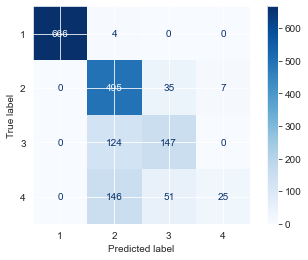

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

# build decision tree classifier
tree = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)
# train decision tree
tree.fit(X_train, y_train)

# make prediction
y_pred_tree = tree.predict(X_test)
print(classification_report(y_test, y_pred_tree))
print(f'Train accuracy:\t {tree.score(X_train, y_train)}')
print(f'Test accuracy:\t {tree.score(X_test, y_test)}')
scores['Decision Tree'] =  tree.score(X_test, y_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_tree, cmap='Blues')

## 1.2 KNeighbors

              precision    recall  f1-score   support

           1       0.98      1.00      0.99       670
           2       0.85      0.92      0.89       537
           3       0.87      0.79      0.83       271
           4       0.90      0.79      0.84       222

    accuracy                           0.91      1700
   macro avg       0.90      0.87      0.89      1700
weighted avg       0.91      0.91      0.91      1700

Train accuracy:	 0.9629162462159435
Test accuracy:	 0.9123529411764706


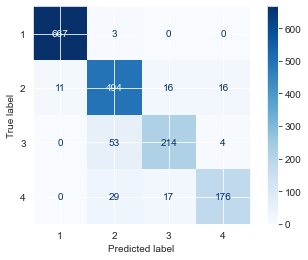

In [23]:
from sklearn.neighbors import KNeighborsClassifier

# build KNeighbors classifier
knn = KNeighborsClassifier(n_neighbors=2)
# train KNeighbors
knn.fit(X_train, y_train)

# make prediction
y_pred_knn = knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))
print(f'Train accuracy:\t {knn.score(X_train, y_train)}')
print(f'Test accuracy:\t {knn.score(X_test, y_test)}')
scores['KNN'] =  knn.score(X_test, y_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn, cmap='Blues')

## 1.3 MLP

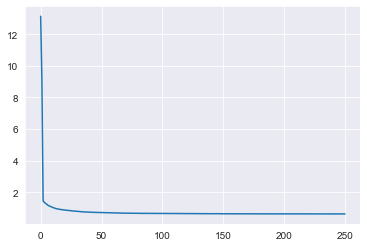

In [24]:
from sklearn.neural_network import MLPClassifier


# build MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(200, 40, 10), activation='relu', solver='adam', max_iter=1000)
# train model
mlp.fit(X_train, y_train)
plt.plot(mlp.loss_curve_)

              precision    recall  f1-score   support

           1       1.00      0.99      1.00       670
           2       0.52      1.00      0.68       537
           3       0.00      0.00      0.00       271
           4       0.75      0.01      0.03       222

    accuracy                           0.71      1700
   macro avg       0.57      0.50      0.43      1700
weighted avg       0.66      0.71      0.61      1700

Train accuracy:	 0.708627648839556
Test accuracy:	 0.7082352941176471


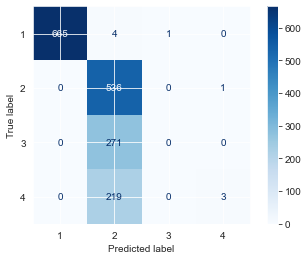

In [25]:
# make prediction
y_pred_mlp = mlp.predict(X_test)
print(classification_report(y_test, y_pred_mlp))
print(f'Train accuracy:\t {mlp.score(X_train, y_train)}')
print(f'Test accuracy:\t {mlp.score(X_test, y_test)}')
scores['MLP'] =  mlp.score(X_test, y_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_mlp, cmap='Blues')

# Classification ensembles and feature selectors

Classifiers used:
- Random Forest
- Voting
- Recursive Feature Elimination

## 1.4 Random Forest

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       670
           2       0.93      0.96      0.94       537
           3       0.94      0.88      0.91       271
           4       0.92      0.91      0.92       222

    accuracy                           0.96      1700
   macro avg       0.95      0.94      0.94      1700
weighted avg       0.96      0.96      0.96      1700

Train accuracy:	 1.0
Test accuracy:	 0.9564705882352941


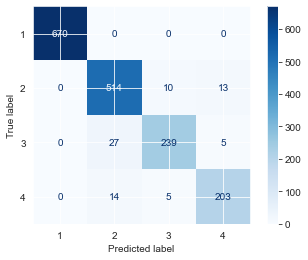

In [26]:
from sklearn.ensemble import RandomForestClassifier

# build random forest classifier
rfc = RandomForestClassifier()
# train random forest
rfc.fit(X_train, y_train)

# make prediction
y_pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, y_pred_rfc))
print(f'Train accuracy:\t {rfc.score(X_train, y_train)}')
print(f'Test accuracy:\t {rfc.score(X_test, y_test)}')
scores['Random Forest'] = rfc.score(X_test, y_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rfc, cmap='Blues')

## 1.5 Voting

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       670
           2       0.88      0.95      0.91       537
           3       0.91      0.83      0.87       271
           4       0.92      0.86      0.89       222

    accuracy                           0.94      1700
   macro avg       0.93      0.91      0.92      1700
weighted avg       0.94      0.94      0.94      1700

Train accuracy:	 0.9868819374369324
Test accuracy:	 0.9370588235294117


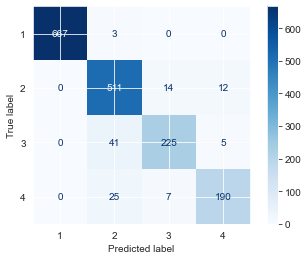

In [27]:
from sklearn.ensemble import VotingClassifier

# build voting classifier
voting_classifier = VotingClassifier(
    estimators=[
        ('tree', tree),
        ('knn', knn),
        ('mlp', mlp),
        ('rfc', rfc)
    ],
    voting='soft'
)
voting_classifier = voting_classifier.fit(X_train, y_train)


# make prediction
y_pred_voting_classifier = voting_classifier.predict(X_test)
print(classification_report(y_test, y_pred_voting_classifier))
print(f'Train accuracy:\t {voting_classifier.score(X_train, y_train)}')
print(f'Test accuracy:\t {voting_classifier.score(X_test, y_test)}')
scores['Voting Classifier'] = voting_classifier.score(X_test, y_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_voting_classifier, cmap='Blues')

# 1.6 Recursive Feature Elimination

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       670
           2       0.93      0.96      0.95       537
           3       0.95      0.87      0.91       271
           4       0.93      0.93      0.93       222

    accuracy                           0.96      1700
   macro avg       0.95      0.94      0.95      1700
weighted avg       0.96      0.96      0.96      1700

Train accuracy:	 0.9994954591321897
Test accuracy:	 0.9588235294117647


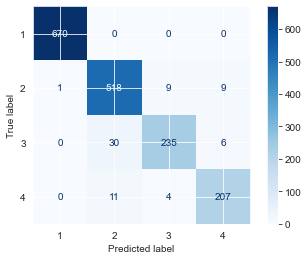

In [28]:
from sklearn.feature_selection import RFE

# build and fit classifier
rfe = RFE(RandomForestClassifier(), step=1).fit(X_train, y_train)

# make prediction
y_pred_rfe = rfe.predict(X_test)
print(classification_report(y_test, y_pred_rfe))
print(f'Train accuracy:\t {rfe.score(X_train, y_train)}')
print(f'Test accuracy:\t {rfe.score(X_test, y_test)}')
scores['RFE'] = rfe.score(X_test, y_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rfe, cmap='Blues')

# PCA or LDA Usage

Our Dataset is presented with several datapoints so we can consider the fact that our dataset is a multi-sensor data fusion application, the need to keep the computational load low is very important, a low-dimensional common representational format may be the answer, to apply a dimension-reducing, or subspace technique to the raw input data. 

## 1.5 PCA

In [29]:
scores_pca = {}

In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

X_pca.shape, y.shape

((5664, 3), (5664,))

PCA variance_ratio
The percentage of the explained variance is: explained_variance_ratio_

The variance i.e. the eigenvalues of the covariance matrix is: explained_variance_

Formula: explained_variance_ratio_ = explained_variance_ / np.sum(explained_variance_)

In [31]:
pca.explained_variance_ratio_

array([9.94993823e-01, 4.73875365e-03, 1.93734503e-04])

In [32]:
pca.explained_variance_ratio_.sum()

0.9999263115533061

In [33]:
# split X and y into training and testing sets
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.30, random_state=42, stratify=y)

print(X_train_pca.shape, X_test_pca.shape, y_train_pca.shape, y_test_pca.shape)

(3964, 3) (1700, 3) (3964,) (1700,)


### 1.5.1 Decision tree

              precision    recall  f1-score   support

           1       0.98      0.99      0.99       670
           2       0.62      0.87      0.72       537
           3       0.88      0.24      0.38       271
           4       0.46      0.41      0.44       222

    accuracy                           0.76      1700
   macro avg       0.74      0.63      0.63      1700
weighted avg       0.78      0.76      0.73      1700

Train accuracy:	 0.7658930373360242
Test accuracy:	 0.7564705882352941


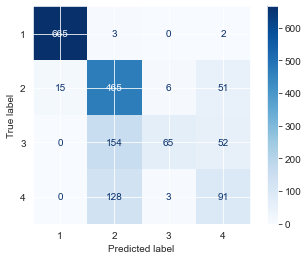

In [34]:
# build decision tree classifier
tree_pca = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)
# train decision tree
tree_pca.fit(X_train_pca, y_train_pca)

# make prediction
y_pred_tree_pca = tree_pca.predict(X_test_pca)
print(classification_report(y_test_pca, y_pred_tree_pca))
print(f'Train accuracy:\t {tree_pca.score(X_train_pca, y_train_pca)}')
print(f'Test accuracy:\t {tree_pca.score(X_test_pca, y_test_pca)}')
scores_pca['Decision Tree PCA'] =  tree_pca.score(X_test_pca, y_test_pca)

ConfusionMatrixDisplay.from_predictions(y_test_pca, y_pred_tree_pca, cmap='Blues')

### 1.5.2 KNeighbors

              precision    recall  f1-score   support

           1       0.98      0.99      0.99       670
           2       0.83      0.90      0.86       537
           3       0.84      0.75      0.79       271
           4       0.87      0.73      0.80       222

    accuracy                           0.89      1700
   macro avg       0.88      0.85      0.86      1700
weighted avg       0.89      0.89      0.89      1700

Train accuracy:	 0.9556004036326943
Test accuracy:	 0.8929411764705882


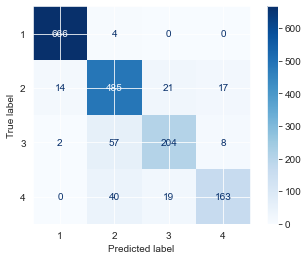

In [35]:
# build KNeighbors classifier
knn_pca = KNeighborsClassifier(n_neighbors=2)
# train KNeighbors
knn_pca.fit(X_train_pca, y_train_pca)

# make prediction
y_pred_knn_pca = knn_pca.predict(X_test_pca)
print(classification_report(y_test_pca, y_pred_knn_pca))
print(f'Train accuracy:\t {knn_pca.score(X_train_pca, y_train_pca)}')
print(f'Test accuracy:\t {knn_pca.score(X_test_pca, y_test_pca)}')
scores_pca['KNN PCA'] =  knn_pca.score(X_test_pca, y_test_pca)

ConfusionMatrixDisplay.from_predictions(y_test_pca, y_pred_knn_pca, cmap='Blues')

### 1.5.3 MLP

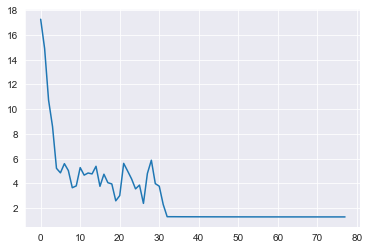

In [36]:
# build MLP classifier
mlp_pca = MLPClassifier(hidden_layer_sizes=(200, 40, 10), activation='relu', solver='adam', max_iter=1000)
# train model
mlp_pca.fit(X_train_pca, y_train_pca)
plt.plot(mlp_pca.loss_curve_)

              precision    recall  f1-score   support

           1       0.39      1.00      0.57       670
           2       0.00      0.00      0.00       537
           3       0.00      0.00      0.00       271
           4       0.00      0.00      0.00       222

    accuracy                           0.39      1700
   macro avg       0.10      0.25      0.14      1700
weighted avg       0.16      0.39      0.22      1700

Train accuracy:	 0.3942986881937437
Test accuracy:	 0.3941176470588235


C:\Users\lemos\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lemos\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lemos\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


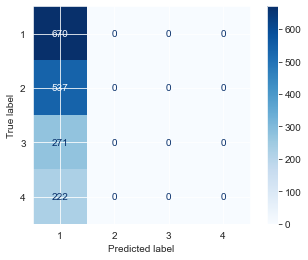

In [37]:
# make prediction
y_pred_mlp_pca = mlp_pca.predict(X_test_pca)
print(classification_report(y_test_pca, y_pred_mlp_pca))
print(f'Train accuracy:\t {mlp_pca.score(X_train_pca, y_train_pca)}')
print(f'Test accuracy:\t {mlp_pca.score(X_test_pca, y_test_pca)}')
scores_pca['MLP PCA'] =  mlp_pca.score(X_test_pca, y_test_pca)

ConfusionMatrixDisplay.from_predictions(y_test_pca, y_pred_mlp_pca, cmap='Blues')

### 1.5.4 Random Forest

              precision    recall  f1-score   support

           1       0.98      0.99      0.98       670
           2       0.85      0.88      0.87       537
           3       0.84      0.82      0.83       271
           4       0.86      0.79      0.83       222

    accuracy                           0.90      1700
   macro avg       0.88      0.87      0.88      1700
weighted avg       0.90      0.90      0.90      1700

Train accuracy:	 0.9851160443995963
Test accuracy:	 0.9005882352941177


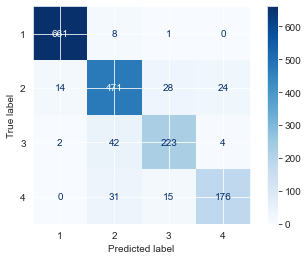

In [38]:
# build random forest classifier
rfc_pca = RandomForestClassifier(criterion='gini', n_estimators=5, random_state=1, n_jobs=2)
# train random forest
rfc_pca.fit(X_train_pca, y_train_pca)

# make prediction
y_pred_rfc_pca = rfc_pca.predict(X_test_pca)
print(classification_report(y_test_pca, y_pred_rfc_pca))
print(f'Train accuracy:\t {rfc_pca.score(X_train_pca, y_train_pca)}')
print(f'Test accuracy:\t {rfc_pca.score(X_test_pca, y_test_pca)}')
scores_pca['Random Forest PCA'] = rfc_pca.score(X_test_pca, y_test_pca)

ConfusionMatrixDisplay.from_predictions(y_test_pca, y_pred_rfc_pca, cmap='Blues')

### 1.5.5 Voting

              precision    recall  f1-score   support

           1       0.98      0.99      0.99       670
           2       0.86      0.89      0.87       537
           3       0.82      0.79      0.80       271
           4       0.86      0.80      0.83       222

    accuracy                           0.90      1700
   macro avg       0.88      0.87      0.87      1700
weighted avg       0.90      0.90      0.90      1700

Train accuracy:	 0.9790615539858728
Test accuracy:	 0.9011764705882352


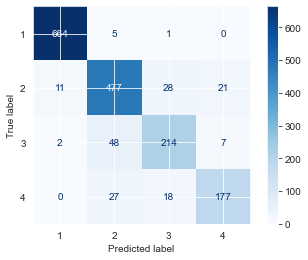

In [39]:
# build voting classifier
voting_classifier_pca = VotingClassifier(
    estimators=[
        ('tree_pca', tree_pca),
        ('knn_pca', knn_pca),
        ('mlp_pca', mlp_pca),
        ('rfc_pca', rfc_pca)
    ],
    voting='soft'
)
voting_classifier_pca = voting_classifier_pca.fit(X_train_pca, y_train_pca)


# make prediction
y_pred_voting_classifier_pca = voting_classifier_pca.predict(X_test_pca)
print(classification_report(y_test_pca, y_pred_voting_classifier_pca))
print(f'Train accuracy:\t {voting_classifier_pca.score(X_train_pca, y_train_pca)}')
print(f'Test accuracy:\t {voting_classifier_pca.score(X_test_pca, y_test_pca)}')
scores_pca['Voting Classifier PCA'] = voting_classifier_pca.score(X_test_pca, y_test_pca)

ConfusionMatrixDisplay.from_predictions(y_test_pca, y_pred_voting_classifier_pca, cmap='Blues')

### 1.5.6 Recursive Feature Elimination

              precision    recall  f1-score   support

           1       0.97      1.00      0.98       670
           2       0.91      0.84      0.87       537
           3       0.84      0.85      0.85       271
           4       0.81      0.88      0.85       222

    accuracy                           0.91      1700
   macro avg       0.88      0.89      0.89      1700
weighted avg       0.91      0.91      0.91      1700

Train accuracy:	 0.9785570131180625
Test accuracy:	 0.9088235294117647


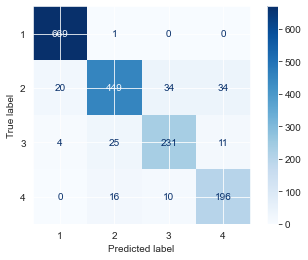

In [40]:
# build and fit classifier
rfe_pca = RFE(RandomForestClassifier(), step=1).fit(X_train_pca, y_train_pca)

# make prediction
y_pred_rfe_pca = rfe_pca.predict(X_test_pca)
print(classification_report(y_test_pca, y_pred_rfe_pca))
print(f'Train accuracy:\t {rfe_pca.score(X_train_pca, y_train_pca)}')
print(f'Test accuracy:\t {rfe_pca.score(X_test_pca, y_test_pca)}')
scores_pca['RFE PCA'] = rfe_pca.score(X_test_pca, y_test_pca)

ConfusionMatrixDisplay.from_predictions(y_test_pca, y_pred_rfe_pca, cmap='Blues')

## 1.6 LDA

In [41]:
scores_lda = {}

In [42]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=3)
X_lda = lda.fit(X, y).transform(X)
X_lda.shape

(5664, 3)

In [43]:
# split X and y into training and testing sets
X_train_lda, X_test_lda, y_train_lda, y_test_lda = train_test_split(X_lda, y, test_size=0.30, random_state=42, stratify=y)

print(X_train_lda.shape, X_test_lda.shape, y_train_lda.shape, y_test_lda.shape)

(3964, 3) (1700, 3) (3964,) (1700,)


### 1.6.1 Decision tree

              precision    recall  f1-score   support

           1       1.00      0.99      1.00       670
           2       0.64      0.81      0.72       537
           3       0.52      0.47      0.49       271
           4       0.66      0.32      0.43       222

    accuracy                           0.76      1700
   macro avg       0.70      0.65      0.66      1700
weighted avg       0.76      0.76      0.75      1700

Train accuracy:	 0.7971745711402624
Test accuracy:	 0.7635294117647059


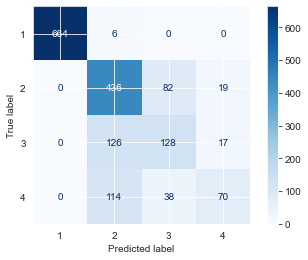

In [44]:
# build decision tree classifier
tree_lda = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)
# train decision tree
tree_lda.fit(X_train_lda, y_train_lda)

# make prediction
y_pred_tree_lda = tree_lda.predict(X_test_lda)
print(classification_report(y_test_lda, y_pred_tree_lda))
print(f'Train accuracy:\t {tree_lda.score(X_train_lda, y_train_lda)}')
print(f'Test accuracy:\t {tree_lda.score(X_test_lda, y_test_lda)}')
scores_lda['Decision Tree LDA'] =  tree_lda.score(X_test_lda, y_test_lda)

ConfusionMatrixDisplay.from_predictions(y_test_lda, y_pred_tree_lda, cmap='Blues')

### 1.6.2 KNeighbors

              precision    recall  f1-score   support

           1       1.00      0.99      1.00       670
           2       0.80      0.83      0.82       537
           3       0.74      0.69      0.71       271
           4       0.72      0.72      0.72       222

    accuracy                           0.86      1700
   macro avg       0.81      0.81      0.81      1700
weighted avg       0.86      0.86      0.86      1700

Train accuracy:	 0.8968213925327951
Test accuracy:	 0.8582352941176471


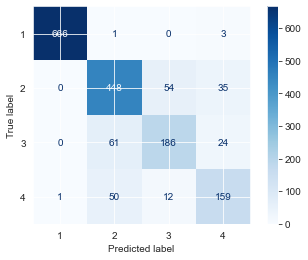

In [45]:
# build KNeighbors classifier
knn_lda = KNeighborsClassifier(n_neighbors=5)
# train KNeighbors
knn_lda.fit(X_train_lda, y_train_lda)

# make prediction
y_pred_knn_lda = knn_lda.predict(X_test_lda)
print(classification_report(y_test_lda, y_pred_knn_lda))
print(f'Train accuracy:\t {knn_lda.score(X_train_lda, y_train_lda)}')
print(f'Test accuracy:\t {knn_lda.score(X_test_lda, y_test_lda)}')
scores_lda['KNN LDA'] =  knn_lda.score(X_test_lda, y_test_lda)

ConfusionMatrixDisplay.from_predictions(y_test_lda, y_pred_knn_lda, cmap='Blues')

### 1.6.3 MLP

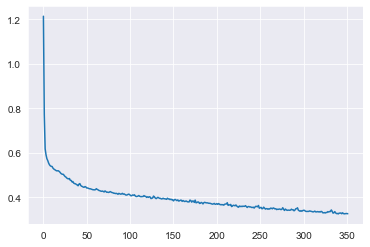

In [46]:
# build MLP classifier
mlp_lda = MLPClassifier(hidden_layer_sizes=(200, 40, 10), activation='relu', solver='adam', max_iter=1000)
# train model
mlp_lda.fit(X_train_lda, y_train_lda)
plt.plot(mlp_lda.loss_curve_)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       670
           2       0.75      0.83      0.79       537
           3       0.66      0.61      0.63       271
           4       0.70      0.59      0.64       222

    accuracy                           0.83      1700
   macro avg       0.78      0.76      0.77      1700
weighted avg       0.83      0.83      0.83      1700

Train accuracy:	 0.8678102926337034
Test accuracy:	 0.83


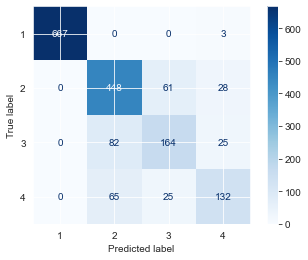

In [47]:
# make prediction
y_pred_mlp_lda = mlp_lda.predict(X_test_lda)
print(classification_report(y_test_lda, y_pred_mlp_lda))
print(f'Train accuracy:\t {mlp_lda.score(X_train_lda, y_train_lda)}')
print(f'Test accuracy:\t {mlp_lda.score(X_test_lda, y_test_lda)}')
scores_lda['MLP LDA'] =  mlp_lda.score(X_test_lda, y_test_lda)

ConfusionMatrixDisplay.from_predictions(y_test_lda,y_pred_mlp_lda, cmap='Blues')

### 1.6.4 Random Forest

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       670
           2       0.80      0.87      0.83       537
           3       0.77      0.70      0.73       271
           4       0.75      0.69      0.72       222

    accuracy                           0.87      1700
   macro avg       0.83      0.81      0.82      1700
weighted avg       0.87      0.87      0.87      1700

Train accuracy:	 0.9818365287588294
Test accuracy:	 0.8676470588235294


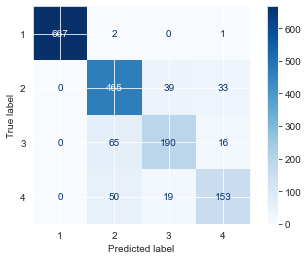

In [48]:
# build random forest classifier
rfc_lda = RandomForestClassifier(criterion='gini', n_estimators=5, random_state=1, n_jobs=2)
# train random forest
rfc_lda.fit(X_train_lda, y_train_lda)

# make prediction
y_pred_rfc_lda = rfc_lda.predict(X_test_lda)
print(classification_report(y_test_lda, y_pred_rfc_lda))
print(f'Train accuracy:\t {rfc_lda.score(X_train_lda, y_train_lda)}')
print(f'Test accuracy:\t {rfc_lda.score(X_test_lda, y_test_lda)}')
scores_lda['Random Forest LDA'] = rfc_lda.score(X_test_lda, y_test_lda)

ConfusionMatrixDisplay.from_predictions(y_test_lda, y_pred_rfc_lda, cmap='Blues')

### 1.6.5 Voting

              precision    recall  f1-score   support

           1       1.00      0.99      1.00       670
           2       0.80      0.88      0.83       537
           3       0.79      0.66      0.72       271
           4       0.72      0.71      0.72       222

    accuracy                           0.87      1700
   macro avg       0.83      0.81      0.82      1700
weighted avg       0.87      0.87      0.86      1700

Train accuracy:	 0.9303733602421796
Test accuracy:	 0.8658823529411764


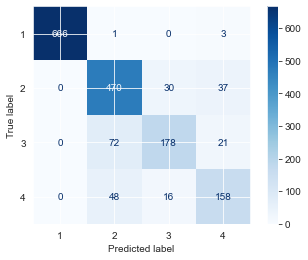

In [49]:
# build voting classifier
voting_classifier_lda = VotingClassifier(
    estimators=[
        ('tree_lda', tree_lda),
        ('knn_lda', knn_lda),
        ('mlp_lda', mlp_lda),
        ('rfc_lda', rfc_lda)
    ],
    voting='soft'
)
voting_classifier_lda = voting_classifier_lda.fit(X_train_lda, y_train_lda)


# make prediction
y_pred_voting_classifier_lda = voting_classifier_lda.predict(X_test_lda)
print(classification_report(y_test_lda, y_pred_voting_classifier_lda))
print(f'Train accuracy:\t {voting_classifier_lda.score(X_train_lda, y_train_lda)}')
print(f'Test accuracy:\t {voting_classifier_lda.score(X_test_lda, y_test_lda)}')
scores_lda['Voting Classifier LDA'] = voting_classifier_lda.score(X_test_lda, y_test_lda)

ConfusionMatrixDisplay.from_predictions(y_test_lda, y_pred_voting_classifier_lda, cmap='Blues')

### 1.6.6 Recursive Feature Elimination

              precision    recall  f1-score   support

           1       1.00      0.99      0.99       670
           2       0.69      0.66      0.67       537
           3       0.54      0.58      0.56       271
           4       0.50      0.53      0.51       222

    accuracy                           0.76      1700
   macro avg       0.68      0.69      0.68      1700
weighted avg       0.76      0.76      0.76      1700

Train accuracy:	 0.9997477295660948
Test accuracy:	 0.758235294117647


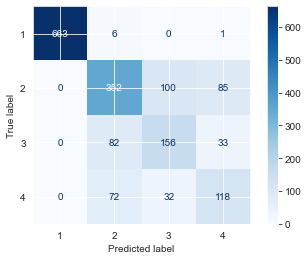

In [50]:
# build and fit classifier
rfe_lda = RFE(RandomForestClassifier(), step=1).fit(X_train_lda, y_train_lda)

# make prediction
y_pred_rfe_lda = rfe_lda.predict(X_test_lda)
print(classification_report(y_test_lda, y_pred_rfe_lda))
print(f'Train accuracy:\t {rfe_lda.score(X_train_lda, y_train_lda)}')
print(f'Test accuracy:\t {rfe_lda.score(X_test_lda, y_test_lda)}')
scores_lda['RFE LDA'] = rfe_lda.score(X_test_lda, y_test_lda)

ConfusionMatrixDisplay.from_predictions(y_test_lda, y_pred_rfe_lda, cmap='Blues')

# 2. Normalized values

In [51]:
scores_scaled = {}

In [52]:
from sklearn.preprocessing import MinMaxScaler

# normalize values
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [5.00000000e-01, 4.26373942e-05, 5.22222222e-01, ...,
        0.00000000e+00, 5.00000000e-01, 1.00000000e+00],
       [4.50000000e-01, 4.26373942e-05, 7.11111111e-01, ...,
        0.00000000e+00, 5.00000000e-01, 1.00000000e+00],
       [4.50000000e-01, 4.26373942e-05, 7.11111111e-01, ...,
        0.00000000e+00, 5.00000000e-01, 1.00000000e+00]])

In [53]:
# split X and y into training and testing sets
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size=0.30, random_state=42, stratify=y)

print(X_train_scaled.shape, X_test_scaled.shape, y_train_scaled.shape, y_test_scaled.shape)

(3964, 23) (1700, 23) (3964,) (1700,)


## 2.1 Decision tree

              precision    recall  f1-score   support

           1       1.00      0.99      1.00       670
           2       0.64      0.92      0.76       537
           3       0.63      0.54      0.58       271
           4       0.78      0.11      0.20       222

    accuracy                           0.78      1700
   macro avg       0.76      0.64      0.63      1700
weighted avg       0.80      0.78      0.75      1700

Train accuracy:	 0.794904137235116
Test accuracy:	 0.7841176470588235


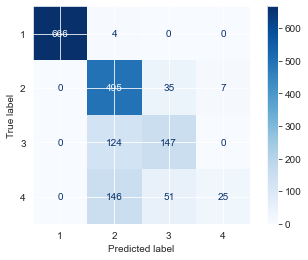

In [54]:
# build decision tree classifier
tree_scaled = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)
# train decision tree
tree_scaled.fit(X_train_scaled, y_train_scaled)

# make prediction
y_pred_tree_scaled = tree_scaled.predict(X_test_scaled)
print(classification_report(y_test_scaled, y_pred_tree_scaled))
print(f'Train accuracy:\t {tree_scaled.score(X_train_scaled, y_train_scaled)}')
print(f'Test accuracy:\t {tree_scaled.score(X_test_scaled, y_test_scaled)}')
scores_scaled['Decision Tree (scaled)'] =  tree_scaled.score(X_test_scaled, y_test_scaled)

ConfusionMatrixDisplay.from_predictions(y_test_scaled, y_pred_tree_scaled, cmap='Blues')

## 2.2 KNeighbors

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       670
           2       0.87      0.96      0.91       537
           3       0.91      0.81      0.86       271
           4       0.89      0.79      0.84       222

    accuracy                           0.93      1700
   macro avg       0.92      0.89      0.90      1700
weighted avg       0.93      0.93      0.93      1700

Train accuracy:	 0.9669525731584259
Test accuracy:	 0.928235294117647


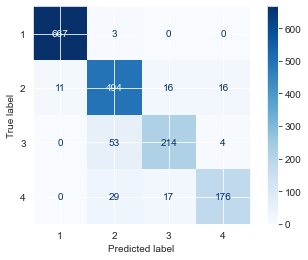

In [55]:
# build KNeighbors classifier
knn_scaled = KNeighborsClassifier(n_neighbors=2)
# train KNeighbors
knn_scaled.fit(X_train_scaled, y_train_scaled)

# make prediction
y_pred_knn_scaled = knn_scaled.predict(X_test_scaled)
print(classification_report(y_test_scaled, y_pred_knn_scaled))
print(f'Train accuracy:\t {knn_scaled.score(X_train_scaled, y_train_scaled)}')
print(f'Test accuracy:\t {knn_scaled.score(X_test_scaled, y_test_scaled)}')
scores_scaled['KNN (scaled)'] =  knn_scaled.score(X_test_scaled, y_test_scaled)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn, cmap='Blues')

## 2.3 MLP

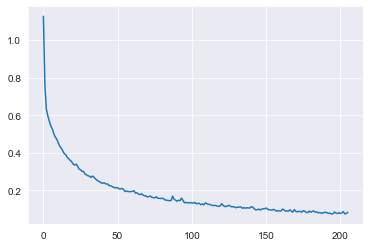

In [56]:
# build MLP classifier
mlp_scaled = MLPClassifier(hidden_layer_sizes=(200, 40, 10), activation='relu', solver='adam', max_iter=1000)
# train model
mlp_scaled.fit(X_train_scaled, y_train_scaled)
plt.plot(mlp_scaled.loss_curve_)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       670
           2       0.90      0.91      0.91       537
           3       0.86      0.85      0.86       271
           4       0.85      0.86      0.86       222

    accuracy                           0.93      1700
   macro avg       0.90      0.90      0.90      1700
weighted avg       0.93      0.93      0.93      1700

Train accuracy:	 0.9788092835519677
Test accuracy:	 0.9276470588235294


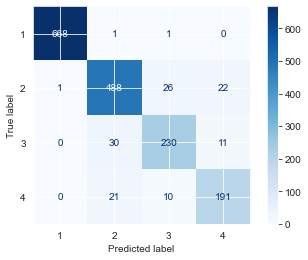

In [57]:
# make prediction
y_pred_mlp_scaled = mlp_scaled.predict(X_test_scaled)
print(classification_report(y_test_scaled, y_pred_mlp_scaled))
print(f'Train accuracy:\t {mlp_scaled.score(X_train_scaled, y_train_scaled)}')
print(f'Test accuracy:\t {mlp_scaled.score(X_test_scaled, y_test_scaled)}')
scores_scaled['MLP (scaled)'] =  mlp_scaled.score(X_test_scaled, y_test_scaled)

ConfusionMatrixDisplay.from_predictions(y_test_scaled, y_pred_mlp_scaled, cmap='Blues')

## 2.4 Random Forest

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       670
           2       0.93      0.96      0.94       537
           3       0.94      0.87      0.90       271
           4       0.92      0.91      0.92       222

    accuracy                           0.96      1700
   macro avg       0.95      0.94      0.94      1700
weighted avg       0.96      0.96      0.96      1700

Train accuracy:	 1.0
Test accuracy:	 0.9558823529411765


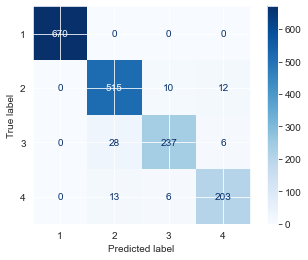

In [58]:
# build random forest classifier
rfc_scaled = RandomForestClassifier()
# train random forest
rfc_scaled.fit(X_train_scaled, y_train_scaled)

# make prediction
y_pred_rfc_scaled = rfc_scaled.predict(X_test_scaled)
print(classification_report(y_test_scaled, y_pred_rfc_scaled))
print(f'Train accuracy:\t {rfc_scaled.score(X_train_scaled, y_train_scaled)}')
print(f'Test accuracy:\t {rfc_scaled.score(X_test_scaled, y_test_scaled)}')
scores_scaled['Random Forest (scaled)'] = rfc_scaled.score(X_test_scaled, y_test_scaled)

ConfusionMatrixDisplay.from_predictions(y_test_scaled, y_pred_rfc_scaled, cmap='Blues')

## 2.5 Voting

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       670
           2       0.92      0.93      0.93       537
           3       0.91      0.87      0.89       271
           4       0.87      0.90      0.88       222

    accuracy                           0.94      1700
   macro avg       0.92      0.92      0.92      1700
weighted avg       0.94      0.94      0.94      1700

Train accuracy:	 0.9959636730575177
Test accuracy:	 0.9429411764705883


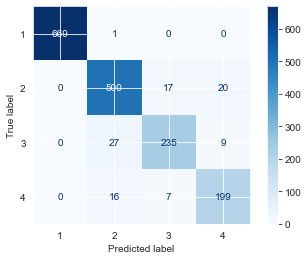

In [59]:
# build voting classifier
voting_classifier_scaled = VotingClassifier(
    estimators=[
        ('tree_scaled', tree_scaled),
        ('knn_scaled', knn_scaled),
        ('mlp_scaled', mlp_scaled),
        ('rfc_scaled', rfc_scaled)
    ],
    voting='soft'
)
voting_classifier_scaled = voting_classifier_scaled.fit(X_train_scaled, y_train_scaled)


# make prediction
y_pred_voting_classifier_scaled = voting_classifier_scaled.predict(X_test_scaled)
print(classification_report(y_test_scaled, y_pred_voting_classifier_scaled))
print(f'Train accuracy:\t {voting_classifier_scaled.score(X_train_scaled, y_train_scaled)}')
print(f'Test accuracy:\t {voting_classifier_scaled.score(X_test_scaled, y_test_scaled)}')
scores_scaled['Voting Classifier (scaled)'] = voting_classifier_scaled.score(X_test_scaled, y_test_scaled)

ConfusionMatrixDisplay.from_predictions(y_test_scaled, y_pred_voting_classifier_scaled, cmap='Blues')

## 2.6 Recursive Feature Elimination

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       670
           2       0.93      0.96      0.94       537
           3       0.95      0.87      0.91       271
           4       0.92      0.93      0.92       222

    accuracy                           0.96      1700
   macro avg       0.95      0.94      0.94      1700
weighted avg       0.96      0.96      0.96      1700

Train accuracy:	 0.9997477295660948
Test accuracy:	 0.9564705882352941


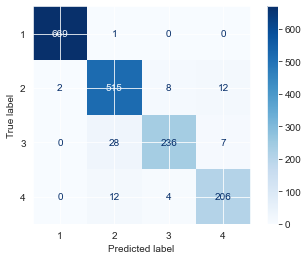

In [60]:
# build and fit classifier
rfe_scaled = RFE(RandomForestClassifier(), step=1).fit(X_train_scaled, y_train_scaled)

# make prediction
y_pred_rfe_scaled = rfe_scaled.predict(X_test_scaled)
print(classification_report(y_test_scaled, y_pred_rfe_scaled))
print(f'Train accuracy:\t {rfe_scaled.score(X_train_scaled, y_train_scaled)}')
print(f'Test accuracy:\t {rfe_scaled.score(X_test_scaled, y_test_scaled)}')
scores_scaled['RFE (scaled)'] = rfe_scaled.score(X_test_scaled, y_test_scaled)

ConfusionMatrixDisplay.from_predictions(y_test_scaled, y_pred_rfe_scaled, cmap='Blues')

## 2.5 PCA

In [61]:
scores_pca_scaled = {}

In [62]:
pca_scaled = PCA(n_components=12)
X_pca_scaled = pca_scaled.fit_transform(X_scaled)

X_pca_scaled.shape, y.shape

((5664, 12), (5664,))

In [63]:
pca_scaled.explained_variance_ratio_

array([0.37473455, 0.1467854 , 0.09238494, 0.07108462, 0.06132245,
       0.04459581, 0.03300204, 0.03048735, 0.0258334 , 0.02049674,
       0.01632387, 0.01568342])

In [64]:
pca_scaled.explained_variance_ratio_.sum()

0.932734579216415

In [65]:
# split X and y into training and testing sets
X_train_pca_scaled, X_test_pca_scaled, y_train_pca_scaled, y_test_pca_scaled = train_test_split(X_pca_scaled, y, test_size=0.30, random_state=42, stratify=y)

print(X_train_pca_scaled.shape, X_test_pca_scaled.shape, y_train_pca_scaled.shape, y_test_pca_scaled.shape)

(3964, 12) (1700, 12) (3964,) (1700,)


### 2.5.1 Decision tree

              precision    recall  f1-score   support

           1       1.00      0.99      1.00       670
           2       0.59      0.88      0.70       537
           3       0.77      0.28      0.41       271
           4       0.38      0.24      0.29       222

    accuracy                           0.74      1700
   macro avg       0.68      0.60      0.60      1700
weighted avg       0.75      0.74      0.72      1700

Train accuracy:	 0.7714429868819375
Test accuracy:	 0.7429411764705882


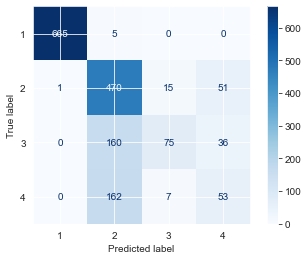

In [66]:
# build decision tree classifier
tree_pca_scaled = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)
# train decision tree
tree_pca_scaled.fit(X_train_pca_scaled, y_train_pca_scaled)

# make prediction
y_pred_tree_pca_scaled = tree_pca_scaled.predict(X_test_pca_scaled)
print(classification_report(y_test_pca_scaled, y_pred_tree_pca_scaled))
print(f'Train accuracy:\t {tree_pca_scaled.score(X_train_pca_scaled, y_train_pca_scaled)}')
print(f'Test accuracy:\t {tree_pca_scaled.score(X_test_pca_scaled, y_test_pca_scaled)}')
scores_pca_scaled['Decision Tree PCA (scaled)'] =  tree_pca_scaled.score(X_test_pca_scaled, y_test_pca_scaled)

ConfusionMatrixDisplay.from_predictions(y_test_pca_scaled, y_pred_tree_pca_scaled, cmap='Blues')

### 2.5.2 KNeighbors

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       670
           2       0.85      0.96      0.90       537
           3       0.92      0.78      0.85       271
           4       0.89      0.80      0.84       222

    accuracy                           0.92      1700
   macro avg       0.92      0.88      0.90      1700
weighted avg       0.93      0.92      0.92      1700

Train accuracy:	 0.9661957618567104
Test accuracy:	 0.9235294117647059


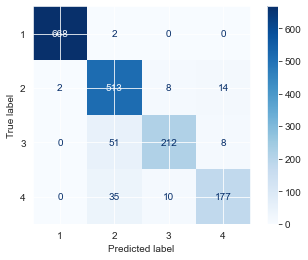

In [67]:
# build KNeighbors classifier
knn_pca_scaled = KNeighborsClassifier(n_neighbors=2)
# train KNeighbors
knn_pca_scaled.fit(X_train_pca_scaled, y_train_pca_scaled)

# make prediction
y_pred_knn_pca_scaled = knn_pca_scaled.predict(X_test_pca_scaled)
print(classification_report(y_test_pca_scaled, y_pred_knn_pca_scaled))
print(f'Train accuracy:\t {knn_pca_scaled.score(X_train_pca_scaled, y_train_pca_scaled)}')
print(f'Test accuracy:\t {knn_pca_scaled.score(X_test_pca_scaled, y_test_pca_scaled)}')
scores_pca_scaled['KNN PCA (scaled)'] =  knn_pca_scaled.score(X_test_pca_scaled, y_test_pca_scaled)

ConfusionMatrixDisplay.from_predictions(y_test_pca_scaled, y_pred_knn_pca_scaled, cmap='Blues')

### 2.5.3 MLP

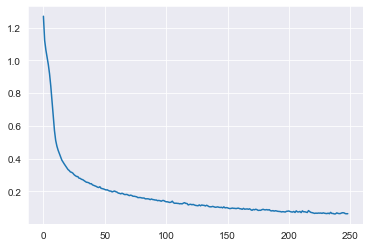

In [68]:
# build MLP classifier
mlp_pca_scaled = MLPClassifier(hidden_layer_sizes=(200, 40, 10), activation='relu', solver='adam', max_iter=1000)
# train model
mlp_pca_scaled.fit(X_train_pca_scaled, y_train_pca_scaled)
plt.plot(mlp_pca_scaled.loss_curve_)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       670
           2       0.88      0.91      0.89       537
           3       0.84      0.82      0.83       271
           4       0.86      0.82      0.84       222

    accuracy                           0.92      1700
   macro avg       0.89      0.89      0.89      1700
weighted avg       0.92      0.92      0.92      1700

Train accuracy:	 0.9803229061553986
Test accuracy:	 0.9170588235294118


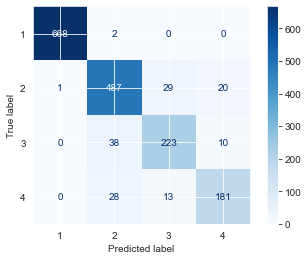

In [69]:
# make prediction
y_pred_mlp_pca_scaled = mlp_pca_scaled.predict(X_test_pca_scaled)
print(classification_report(y_test_pca_scaled, y_pred_mlp_pca_scaled))
print(f'Train accuracy:\t {mlp_pca_scaled.score(X_train_pca_scaled, y_train_pca_scaled)}')
print(f'Test accuracy:\t {mlp_pca_scaled.score(X_test_pca_scaled, y_test_pca_scaled)}')
scores_pca_scaled['MLP PCA (scaled)'] =  mlp_pca_scaled.score(X_test_pca_scaled, y_test_pca_scaled)

ConfusionMatrixDisplay.from_predictions(y_test_pca_scaled, y_pred_mlp_pca_scaled, cmap='Blues')

### 2.5.4 Random Forest

              precision    recall  f1-score   support

           1       1.00      0.99      1.00       670
           2       0.86      0.94      0.90       537
           3       0.89      0.80      0.84       271
           4       0.87      0.79      0.83       222

    accuracy                           0.92      1700
   macro avg       0.90      0.88      0.89      1700
weighted avg       0.92      0.92      0.92      1700

Train accuracy:	 0.9876387487386479
Test accuracy:	 0.918235294117647


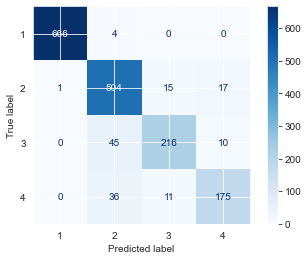

In [70]:
# build random forest classifier
rfc_pca_scaled = RandomForestClassifier(criterion='gini', n_estimators=5, random_state=1, n_jobs=2)
# train random forest
rfc_pca_scaled.fit(X_train_pca_scaled, y_train_pca_scaled)

# make prediction
y_pred_rfc_pca_scaled = rfc_pca_scaled.predict(X_test_pca_scaled)
print(classification_report(y_test_pca_scaled, y_pred_rfc_pca_scaled))
print(f'Train accuracy:\t {rfc_pca_scaled.score(X_train_pca_scaled, y_train_pca_scaled)}')
print(f'Test accuracy:\t {rfc_pca_scaled.score(X_test_pca_scaled, y_test_pca_scaled)}')
scores_pca_scaled['Random Forest PCA (scaled)'] = rfc_pca_scaled.score(X_test_pca_scaled, y_test_pca_scaled)

ConfusionMatrixDisplay.from_predictions(y_test_pca_scaled, y_pred_rfc_pca_scaled, cmap='Blues')

### 2.5.5 Voting

              precision    recall  f1-score   support

           1       1.00      0.99      1.00       670
           2       0.90      0.92      0.91       537
           3       0.90      0.83      0.86       271
           4       0.85      0.87      0.86       222

    accuracy                           0.93      1700
   macro avg       0.91      0.90      0.91      1700
weighted avg       0.93      0.93      0.93      1700

Train accuracy:	 0.9926841574167508
Test accuracy:	 0.9294117647058824


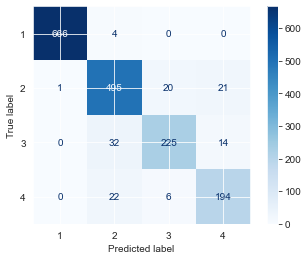

In [71]:
# build voting classifier
voting_classifier_pca_scaled = VotingClassifier(
    estimators=[
        ('tree_pca_scaled', tree_pca_scaled),
        ('knn_pca_scaled', knn_pca_scaled),
        ('mlp_pca_scaled', mlp_pca_scaled),
        ('rfc_pca_scaled', rfc_pca_scaled)
    ],
    voting='soft'
)
voting_classifier_pca_scaled = voting_classifier_pca_scaled.fit(X_train_pca_scaled, y_train_pca_scaled)


# make prediction
y_pred_voting_classifier_pca_scaled = voting_classifier_pca_scaled.predict(X_test_pca_scaled)
print(classification_report(y_test_pca_scaled, y_pred_voting_classifier_pca_scaled))
print(f'Train accuracy:\t {voting_classifier_pca_scaled.score(X_train_pca_scaled, y_train_pca_scaled)}')
print(f'Test accuracy:\t {voting_classifier_pca_scaled.score(X_test_pca_scaled, y_test_pca_scaled)}')
scores_pca_scaled['Voting Classifier PCA (scaled)'] = voting_classifier_pca_scaled.score(X_test_pca_scaled, y_test_pca_scaled)

ConfusionMatrixDisplay.from_predictions(y_test_pca_scaled, y_pred_voting_classifier_pca_scaled, cmap='Blues')

### 2.5.6 Recursive Feature Elimination

              precision    recall  f1-score   support

           1       1.00      0.99      1.00       670
           2       0.88      0.93      0.90       537
           3       0.92      0.82      0.87       271
           4       0.83      0.85      0.84       222

    accuracy                           0.93      1700
   macro avg       0.91      0.90      0.90      1700
weighted avg       0.93      0.93      0.93      1700

Train accuracy:	 1.0
Test accuracy:	 0.9264705882352942


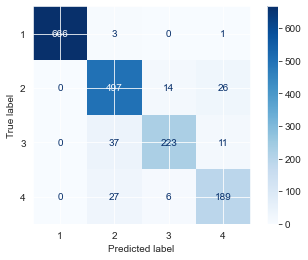

In [72]:
# build and fit classifier
rfe_pca_scaled = RFE(RandomForestClassifier(), step=1).fit(X_train_pca_scaled, y_train_pca_scaled)

# make prediction
y_pred_rfe_pca_scaled = rfe_pca_scaled.predict(X_test_pca_scaled)
print(classification_report(y_test_pca_scaled, y_pred_rfe_pca_scaled))
print(f'Train accuracy:\t {rfe_pca_scaled.score(X_train_pca_scaled, y_train_pca_scaled)}')
print(f'Test accuracy:\t {rfe_pca_scaled.score(X_test_pca_scaled, y_test_pca_scaled)}')
scores_pca_scaled['RFE PCA (scaled)'] = rfe_pca_scaled.score(X_test_pca_scaled, y_test_pca_scaled)

ConfusionMatrixDisplay.from_predictions(y_test_pca_scaled, y_pred_rfe_pca_scaled, cmap='Blues')

## 2.6 LDA

In [73]:
scores_lda_scaled = {}

In [74]:
lda_scaled = LinearDiscriminantAnalysis(n_components=2)
X_lda_scaled = lda_scaled.fit(X_scaled, y).transform(X_scaled)
X_lda_scaled.shape

(5664, 2)

In [75]:
# split X and y into training and testing sets
X_train_lda_scaled, X_test_lda_scaled, y_train_lda_scaled, y_test_lda_scaled = train_test_split(X_lda_scaled, y, test_size=0.30, random_state=42, stratify=y)

print(X_train_lda_scaled.shape, X_test_lda_scaled.shape, y_train_lda_scaled.shape, y_test_lda_scaled.shape)

(3964, 2) (1700, 2) (3964,) (1700,)


### 2.6.1 Decision tree

              precision    recall  f1-score   support

           1       1.00      0.99      1.00       670
           2       0.64      0.80      0.71       537
           3       0.55      0.44      0.49       271
           4       0.50      0.32      0.39       222

    accuracy                           0.76      1700
   macro avg       0.67      0.64      0.65      1700
weighted avg       0.75      0.76      0.75      1700

Train accuracy:	 0.7835519677093845
Test accuracy:	 0.7558823529411764


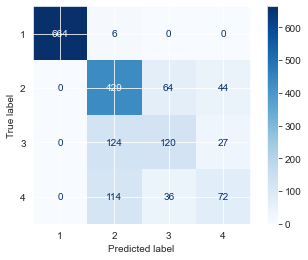

In [76]:
# build decision tree classifier
tree_lda_scaled = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)
# train decision tree
tree_lda_scaled.fit(X_train_lda_scaled, y_train_lda_scaled)

# make prediction
y_pred_tree_lda_scaled = tree_lda_scaled.predict(X_test_lda_scaled)
print(classification_report(y_test_lda_scaled, y_pred_tree_lda_scaled))
print(f'Train accuracy:\t {tree_lda_scaled.score(X_train_lda_scaled, y_train_lda_scaled)}')
print(f'Test accuracy:\t {tree_lda_scaled.score(X_test_lda_scaled, y_test_lda_scaled)}')
scores_lda_scaled['Decision Tree LDA (scaled)'] =  tree_lda_scaled.score(X_test_lda_scaled, y_test_lda_scaled)

ConfusionMatrixDisplay.from_predictions(y_test_lda_scaled, y_pred_tree_lda_scaled, cmap='Blues')

### 2.6.2 KNeighbors

              precision    recall  f1-score   support

           1       1.00      0.99      1.00       670
           2       0.72      0.87      0.79       537
           3       0.70      0.62      0.66       271
           4       0.79      0.54      0.64       222

    accuracy                           0.83      1700
   macro avg       0.80      0.75      0.77      1700
weighted avg       0.84      0.83      0.83      1700

Train accuracy:	 0.9195257315842583
Test accuracy:	 0.8347058823529412


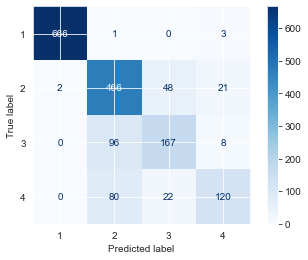

In [77]:
# build KNeighbors classifier
knn_lda_scaled = KNeighborsClassifier(n_neighbors=2)
# train KNeighbors
knn_lda_scaled.fit(X_train_lda_scaled, y_train_lda_scaled)

# make prediction
y_pred_knn_lda_scaled = knn_lda_scaled.predict(X_test_lda_scaled)
print(classification_report(y_test_lda_scaled, y_pred_knn_lda_scaled))
print(f'Train accuracy:\t {knn_lda_scaled.score(X_train_lda_scaled, y_train_lda_scaled)}')
print(f'Test accuracy:\t {knn_lda_scaled.score(X_test_lda_scaled, y_test_lda_scaled)}')
scores_lda_scaled['KNN LDA (scaled)'] =  knn_lda_scaled.score(X_test_lda_scaled, y_test_lda_scaled)

ConfusionMatrixDisplay.from_predictions(y_test_lda_scaled, y_pred_knn_lda_scaled, cmap='Blues')

### 2.6.3 MLP

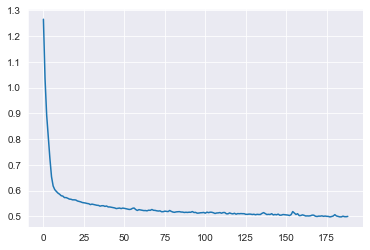

In [78]:
# build MLP classifier
mlp_lda_scaled = MLPClassifier(hidden_layer_sizes=(200, 40, 10), activation='relu', solver='adam', max_iter=1000)
# train model
mlp_lda_scaled.fit(X_train_lda_scaled, y_train_lda_scaled)
plt.plot(mlp_lda_scaled.loss_curve_)

              precision    recall  f1-score   support

           1       0.99      0.99      0.99       670
           2       0.64      0.75      0.69       537
           3       0.50      0.39      0.44       271
           4       0.33      0.28      0.31       222

    accuracy                           0.73      1700
   macro avg       0.62      0.60      0.61      1700
weighted avg       0.72      0.73      0.72      1700

Train accuracy:	 0.7613521695257316
Test accuracy:	 0.7276470588235294


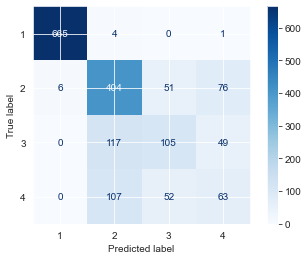

In [79]:
# make prediction
y_pred_mlp_lda_scaled = mlp_lda_scaled.predict(X_test_lda_scaled)
print(classification_report(y_test_lda_scaled, y_pred_mlp_lda_scaled))
print(f'Train accuracy:\t {mlp_lda_scaled.score(X_train_lda_scaled, y_train_lda_scaled)}')
print(f'Test accuracy:\t {mlp_lda_scaled.score(X_test_lda_scaled, y_test_lda_scaled)}')
scores_lda_scaled['MLP LDA (scaled)'] =  mlp_lda_scaled.score(X_test_lda_scaled, y_test_lda_scaled)

ConfusionMatrixDisplay.from_predictions(y_test_lda_scaled, y_pred_mlp_lda_scaled, cmap='Blues')

### 2.6.4 Random Forest

              precision    recall  f1-score   support

           1       1.00      0.99      1.00       670
           2       0.77      0.83      0.80       537
           3       0.70      0.66      0.68       271
           4       0.71      0.62      0.66       222

    accuracy                           0.84      1700
   macro avg       0.79      0.78      0.78      1700
weighted avg       0.84      0.84      0.84      1700

Train accuracy:	 0.9722502522704339
Test accuracy:	 0.8405882352941176


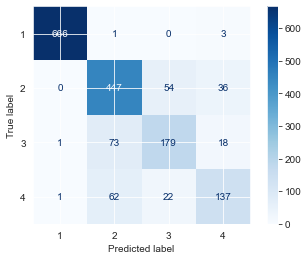

In [80]:
# build random forest classifier
rfc_lda_scaled = RandomForestClassifier(criterion='gini', n_estimators=5, random_state=1, n_jobs=2)
# train random forest
rfc_lda_scaled.fit(X_train_lda_scaled, y_train_lda_scaled)

# make prediction
y_pred_rfc_lda_scaled = rfc_lda_scaled.predict(X_test_lda_scaled)
print(classification_report(y_test_lda_scaled, y_pred_rfc_lda_scaled))
print(f'Train accuracy:\t {rfc_lda_scaled.score(X_train_lda_scaled, y_train_lda_scaled)}')
print(f'Test accuracy:\t {rfc_lda_scaled.score(X_test_lda_scaled, y_test_lda_scaled)}')
scores_lda_scaled['Random Forest LDA (scaled)'] = rfc_lda_scaled.score(X_test_lda_scaled, y_test_lda_scaled)

ConfusionMatrixDisplay.from_predictions(y_test_lda_scaled, y_pred_rfc_lda_scaled, cmap='Blues')

### 2.6.5 Voting

              precision    recall  f1-score   support

           1       1.00      0.99      1.00       670
           2       0.75      0.85      0.80       537
           3       0.72      0.62      0.67       271
           4       0.72      0.62      0.66       222

    accuracy                           0.84      1700
   macro avg       0.80      0.77      0.78      1700
weighted avg       0.84      0.84      0.84      1700

Train accuracy:	 0.9442482341069627
Test accuracy:	 0.8394117647058823


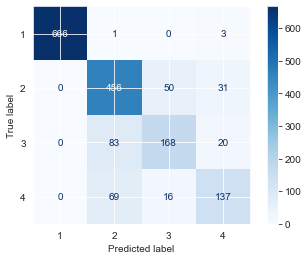

In [81]:
# build voting classifier
voting_classifier_lda_scaled = VotingClassifier(
    estimators=[
        ('tree_lda_scaled', tree_lda_scaled),
        ('knn_lda_scaled', knn_lda_scaled),
        ('mlp_lda_scaled', mlp_lda_scaled),
        ('rfc_lda_scaled', rfc_lda_scaled)
    ],
    voting='soft'
)
voting_classifier_lda_scaled = voting_classifier_lda_scaled.fit(X_train_lda_scaled, y_train_lda_scaled)


# make prediction
y_pred_voting_classifier_lda_scaled = voting_classifier_lda_scaled.predict(X_test_lda_scaled)
print(classification_report(y_test_lda_scaled, y_pred_voting_classifier_lda_scaled))
print(f'Train accuracy:\t {voting_classifier_lda_scaled.score(X_train_lda_scaled, y_train_lda_scaled)}')
print(f'Test accuracy:\t {voting_classifier_lda_scaled.score(X_test_lda_scaled, y_test_lda_scaled)}')
scores_lda_scaled['Voting Classifier LDA (scaled)'] = voting_classifier_lda_scaled.score(X_test_lda_scaled, y_test_lda_scaled)

ConfusionMatrixDisplay.from_predictions(y_test_lda_scaled, y_pred_voting_classifier_lda_scaled, cmap='Blues')

### 2.6.5 Recursive Feature Elimination

              precision    recall  f1-score   support

           1       1.00      0.99      0.99       670
           2       0.69      0.66      0.67       537
           3       0.54      0.58      0.56       271
           4       0.50      0.53      0.51       222

    accuracy                           0.76      1700
   macro avg       0.68      0.69      0.68      1700
weighted avg       0.76      0.76      0.76      1700

Train accuracy:	 0.9994954591321897
Test accuracy:	 0.7576470588235295


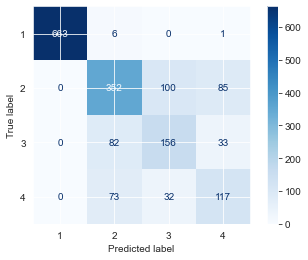

In [82]:
# build and fit classifier
rfe_lda_scaled = RFE(RandomForestClassifier(), step=1).fit(X_train_lda_scaled, y_train_lda_scaled)

# make prediction
y_pred_rfe_lda_scaled = rfe_lda_scaled.predict(X_test_lda_scaled)
print(classification_report(y_test_lda_scaled, y_pred_rfe_lda_scaled))
print(f'Train accuracy:\t {rfe_lda_scaled.score(X_train_lda_scaled, y_train_lda_scaled)}')
print(f'Test accuracy:\t {rfe_lda_scaled.score(X_test_lda_scaled, y_test_lda_scaled)}')
scores_lda_scaled['RFE LDA (scaled)'] = rfe_lda_scaled.score(X_test_lda_scaled, y_test_lda_scaled)

ConfusionMatrixDisplay.from_predictions(y_test_lda_scaled, y_pred_rfe_lda_scaled, cmap='Blues')

# Final scores

## Non-normalized

Text(0, 0.5, 'Models')

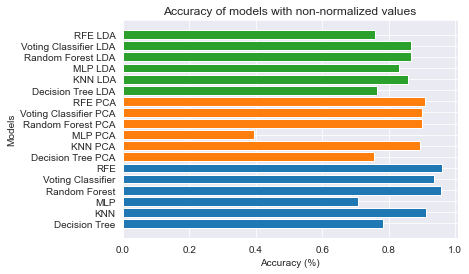

In [83]:
plt.barh(list(scores.keys()), scores.values())
plt.barh(list(scores_pca.keys()), scores_pca.values())
plt.barh(list(scores_lda.keys()), scores_lda.values())
plt.title('Accuracy of models with non-normalized values')
plt.xlabel('Accuracy (%)')
plt.ylabel('Models')

In [84]:
print(f'Scores: {scores}\n')
print(f'Scores PCA: {scores_pca}\n')
print(f'Scores LDA: {scores_lda}')

Scores: {'Decision Tree': 0.7841176470588235, 'KNN': 0.9123529411764706, 'MLP': 0.7082352941176471, 'Random Forest': 0.9564705882352941, 'Voting Classifier': 0.9370588235294117, 'RFE': 0.9588235294117647}

Scores PCA: {'Decision Tree PCA': 0.7564705882352941, 'KNN PCA': 0.8929411764705882, 'MLP PCA': 0.3941176470588235, 'Random Forest PCA': 0.9005882352941177, 'Voting Classifier PCA': 0.9011764705882352, 'RFE PCA': 0.9088235294117647}

Scores LDA: {'Decision Tree LDA': 0.7635294117647059, 'KNN LDA': 0.8582352941176471, 'MLP LDA': 0.83, 'Random Forest LDA': 0.8676470588235294, 'Voting Classifier LDA': 0.8658823529411764, 'RFE LDA': 0.758235294117647}


In [85]:
# get the highest accuracy
max(max(scores.values()), max(scores_pca.values()), max(scores_lda.values()))

0.9588235294117647

## Normalized

Text(0, 0.5, 'Models')

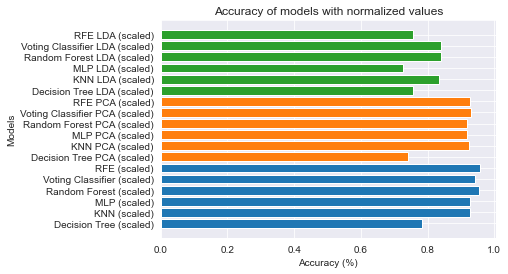

In [86]:
plt.barh(list(scores_scaled.keys()), scores_scaled.values())
plt.barh(list(scores_pca_scaled.keys()), scores_pca_scaled.values())
plt.barh(list(scores_lda_scaled.keys()), scores_lda_scaled.values())
plt.title('Accuracy of models with normalized values')
plt.xlabel('Accuracy (%)')
plt.ylabel('Models')

In [87]:
print(f'Scores: {scores_scaled}\n')
print(f'Scores PCA: {scores_pca_scaled}\n')
print(f'Scores LDA: {scores_lda_scaled}')

Scores: {'Decision Tree (scaled)': 0.7841176470588235, 'KNN (scaled)': 0.928235294117647, 'MLP (scaled)': 0.9276470588235294, 'Random Forest (scaled)': 0.9558823529411765, 'Voting Classifier (scaled)': 0.9429411764705883, 'RFE (scaled)': 0.9564705882352941}

Scores PCA: {'Decision Tree PCA (scaled)': 0.7429411764705882, 'KNN PCA (scaled)': 0.9235294117647059, 'MLP PCA (scaled)': 0.9170588235294118, 'Random Forest PCA (scaled)': 0.918235294117647, 'Voting Classifier PCA (scaled)': 0.9294117647058824, 'RFE PCA (scaled)': 0.9264705882352942}

Scores LDA: {'Decision Tree LDA (scaled)': 0.7558823529411764, 'KNN LDA (scaled)': 0.8347058823529412, 'MLP LDA (scaled)': 0.7276470588235294, 'Random Forest LDA (scaled)': 0.8405882352941176, 'Voting Classifier LDA (scaled)': 0.8394117647058823, 'RFE LDA (scaled)': 0.7576470588235295}


In [88]:
# get the highest accuracy
max(max(scores_scaled.values()), max(scores_pca_scaled.values()), max(scores_lda_scaled.values()))

0.9564705882352941

# Best model

## Cross validation

In [108]:
import numpy as np
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rfe, X, y, cv=5)
print(f'RFE cross validation score: {np.mean(cv_scores)}')
cv_scores

RFE cross validation score: 0.9510562752366031


array([0.94199243, 0.95460277, 0.96343001, 0.95712484, 0.93813131])

# Feature importance

Text(0.5, 1.0, 'Importance of each feature')

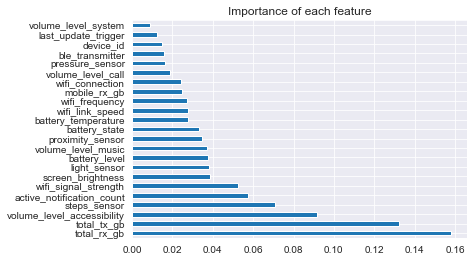

In [90]:
pd.Series(
    rfc.feature_importances_, index=X.columns
).nlargest(len(X.columns)).plot(kind='barh').set_title('Importance of each feature')

Text(0.5, 1.0, 'Importance of each feature')

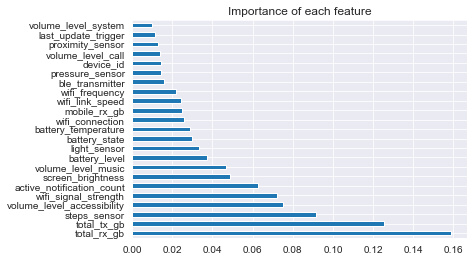

In [91]:
pd.Series(
    rfc_scaled.feature_importances_, index=X.columns
).nlargest(len(X.columns)).plot(kind='barh').set_title('Importance of each feature')

# SelectKBest

In [92]:
df_test = pd.concat([
    pd.DataFrame(X_scaled, columns=X.columns), y.reset_index()], axis=1
).drop('time', axis=1)
df_test

,last_update_trigger,light_sensor,active_notification_count,pressure_sensor,battery_temperature,screen_brightness,wifi_link_speed,battery_level,wifi_signal_strength,total_tx_gb,...,volume_level_call,volume_level_music,volume_level_accessibility,wifi_connection,mobile_rx_gb,volume_level_system,battery_state,ble_transmitter,device_id,last_used_app
0,0.00,0.000000,0.000000,0.0,0.000000,0.0,0.001468,0.74,1.000000,0.000000,...,0.0000,0.000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,1
1,0.00,0.000000,0.000000,0.0,0.537530,0.0,0.001468,0.73,1.000000,0.000000,...,0.0000,0.000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,1
2,0.00,0.000000,0.000000,0.0,0.527845,0.0,0.001468,0.72,1.000000,0.000000,...,0.0000,0.000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,1
3,0.00,0.000000,0.000000,0.0,0.530266,0.0,0.001468,0.71,1.000000,0.000000,...,0.0000,0.000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,1
4,0.00,0.000000,0.000000,0.0,0.523002,0.0,0.001468,0.70,1.000000,0.000000,...,0.0000,0.000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5659,0.10,0.001364,0.400000,0.0,0.441889,0.0,0.502055,0.76,0.348315,0.018830,...,0.9375,0.125,0.266667,0.0,0.0,0.214286,0.0,0.5,1.0,3
5660,0.45,0.000863,0.444444,0.0,0.426150,0.0,0.502055,0.76,0.348315,0.018830,...,0.9375,0.125,0.266667,0.0,0.0,0.214286,0.0,0.5,1.0,3
5661,0.50,0.000043,0.522222,0.0,0.415254,0.0,0.516735,0.75,0.348315,0.018830,...,0.9375,0.125,0.266667,0.0,0.0,0.214286,0.0,0.5,1.0,3
5662,0.45,0.000043,0.711111,0.0,0.415254,0.0,0.516735,0.75,0.348315,0.018969,...,0.9375,0.125,0.266667,0.0,0.0,0.214286,0.0,0.5,1.0,3


## Best features

In [93]:
from sklearn.feature_selection import SelectKBest, chi2

def best_features(df, target):
    features = list(df.columns)
    features.remove(target)

    X = df[features]
    y = df[target]

    # apply SelectKBest class to extract top 10 best features
    bestfeatures = SelectKBest(score_func=chi2, k='all')
    fit = bestfeatures.fit(X, y)
    dfscores = pd.DataFrame(fit.scores_)
    dfcolumns = pd.DataFrame(X.columns)
    # concat two dataframes for better visualization
    feature_scores = pd.concat([dfcolumns, dfscores], axis=1)
    # naming the dataframe columns
    feature_scores.columns = ['Feature', 'Score']
    # print 10 best features
    return feature_scores.nlargest(10, 'Score')

best_features(df_test, 'last_used_app')

,Feature,Score
14,volume_level_call,1262.550058
10,wifi_frequency,1185.699946
12,proximity_sensor,1041.605441
21,ble_transmitter,945.368318
16,volume_level_accessibility,944.282341
11,total_rx_gb,848.841101
3,pressure_sensor,791.953256
13,steps_sensor,785.705721
9,total_tx_gb,779.377434
15,volume_level_music,621.247050


## Worst features

In [94]:
def worst_features(df, target):
    features = list(df.columns)
    features.remove(target)

    X = df[features]
    y = df[target]

    # apply SelectKBest class to extract top 10 best features
    bestfeatures = SelectKBest(score_func=chi2, k='all')
    fit = bestfeatures.fit(X, y)
    dfscores = pd.DataFrame(fit.scores_)
    dfcolumns = pd.DataFrame(X.columns)
    # concat two dataframes for better visualization
    feature_scores = pd.concat([dfcolumns, dfscores], axis=1)
    # naming the dataframe columns
    feature_scores.columns = ['Feature', 'Score']
    # print 10 best features
    return feature_scores.nsmallest(10, 'Score')

worst_features(df_test, 'last_used_app')

,Feature,Score
1,light_sensor,14.215015
22,device_id,14.693283
4,battery_temperature,113.741227
7,battery_level,113.828359
19,volume_level_system,277.332229
0,last_update_trigger,287.513745
5,screen_brightness,336.342224
8,wifi_signal_strength,379.430444
2,active_notification_count,421.114055
20,battery_state,423.202837


## Largest features

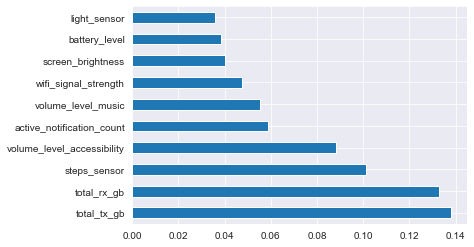

Index(['total_tx_gb', 'total_rx_gb', 'steps_sensor',
       'volume_level_accessibility', 'active_notification_count',
       'volume_level_music', 'wifi_signal_strength', 'screen_brightness',
       'battery_level', 'light_sensor'],
      dtype='object')


In [95]:
def largest(df, target):
    features = list(df.columns)
    features.remove(target)

    X = df[features]
    y = df[target]

    model = RandomForestClassifier()
    model.fit(X, y)
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    feat_importances.nlargest(10).plot(kind='barh')
    plt.show()
    print(feat_importances.nlargest(10).index)

largest(df_test, 'last_used_app')

## Smallest features

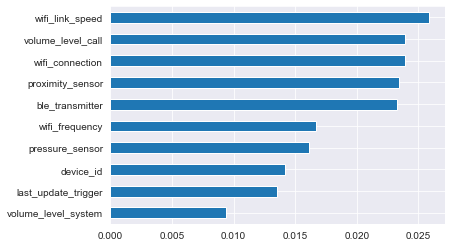

['volume_level_system',
 'last_update_trigger',
 'device_id',
 'pressure_sensor',
 'wifi_frequency',
 'ble_transmitter',
 'proximity_sensor',
 'wifi_connection',
 'volume_level_call',
 'wifi_link_speed']

In [96]:
def smallest(df, target):
    features = list(df.columns)
    features.remove(target)

    X = df[features]
    y = df[target]

    from sklearn.ensemble import ExtraTreesClassifier
    model = RandomForestClassifier()
    model.fit(X, y)
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    feat_importances.nsmallest(10).plot(kind='barh')
    plt.show()
    return feat_importances.nsmallest(10).index.to_list()

smallest(df_test, 'last_used_app')

# RFE

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       670
           2       0.93      0.96      0.94       537
           3       0.94      0.88      0.91       271
           4       0.93      0.93      0.93       222

    accuracy                           0.96      1700
   macro avg       0.95      0.94      0.94      1700
weighted avg       0.96      0.96      0.96      1700

Train accuracy:	 0.9994954591321897
Test accuracy:	 0.9570588235294117


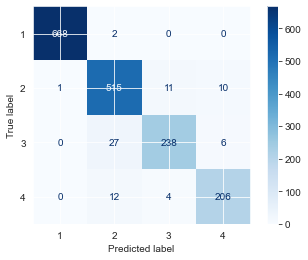

In [97]:
from sklearn.feature_selection import RFE

model = RFE(RandomForestClassifier(), step=1).fit(X_train_scaled, y_train_scaled)

# make prediction
y_pred_model = model.predict(X_test_scaled)
print(classification_report(y_test_scaled, y_pred_model))
print(f'Train accuracy:\t {model.score(X_train_scaled, y_train_scaled)}')
print(f'Test accuracy:\t {model.score(X_test_scaled, y_test_scaled)}')

ConfusionMatrixDisplay.from_predictions(y_test_scaled, y_pred_model, cmap='Blues')

## Summarize features

In [109]:
selected_features = []

print(f'{"Feature":^28}|{"Selected":^12}|{"Rank":^6}')
for i in range(X_train_scaled.shape[1]):
    if model.support_[i]:
        # add selected features to list
        selected_features.append(df_test.columns[i])
    # print table of all summarized features
    print('\033[4m' + f'{df_test.columns[i]:<28}|{"Yes" if model.support_[i] else "No":^12}|{model.ranking_[i]:^6}' + '\033[0m')

          Feature           |  Selected  | Rank 
last_update_trigger         |     No     |  11  
light_sensor                |     No     |  2   
active_notification_count   |    Yes     |  1   
pressure_sensor             |     No     |  8   
battery_temperature         |    Yes     |  1   
screen_brightness           |    Yes     |  1   
wifi_link_speed             |     No     |  3   
battery_level               |    Yes     |  1   
wifi_signal_strength        |    Yes     |  1   
total_tx_gb                 |    Yes     |  1   
wifi_frequency              |     No     |  6   
total_rx_gb                 |    Yes     |  1   
proximity_sensor            |     No     |  9   
steps_sensor                |    Yes     |  1   
volume_level_call           |     No     |  10  
volume_level_music          |    Yes     |  1   
volume_level_accessibility  |    Yes     |  1   
wifi_connection             |    Yes     |  1   
mobile_rx_gb                |     No     |  4   
volume_level_system 

In [110]:
selected_features

['active_notification_count',
 'battery_temperature',
 'screen_brightness',
 'battery_level',
 'wifi_signal_strength',
 'total_tx_gb',
 'total_rx_gb',
 'steps_sensor',
 'volume_level_music',
 'volume_level_accessibility',
 'wifi_connection']

# TODO
manually take out unimportant features and retrain model

# SelectFromModel

In [113]:
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(
    estimator=rfc,
    threshold=0.015,
    prefit=False,
    norm_order=1,
    max_features=5
).fit(X, y)

selector.transform(X)

array([[ 0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00],
       [ 0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00],
       [ 0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00],
       ...,
       [-5.800e+01,  1.350e-01,  3.626e+00,  5.860e+02,  4.000e+00],
       [-5.800e+01,  1.360e-01,  3.626e+00,  5.860e+02,  4.000e+00],
       [-5.800e+01,  1.360e-01,  3.627e+00,  5.860e+02,  4.000e+00]])

# Coeficients

C:\Users\lemos\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


No. of features: 24
['active_notification_count', 'battery_level', 'battery_state', 'battery_temperature', 'ble_transmitter', 'device_id', 'last_update_trigger', 'last_used_app', 'light_sensor', 'mobile_rx_gb', 'pressure_sensor', 'proximity_sensor', 'screen_brightness', 'steps_sensor', 'total_rx_gb', 'total_tx_gb', 'volume_level_accessibility', 'volume_level_call', 'volume_level_music', 'volume_level_system', 'wifi_connection', 'wifi_frequency', 'wifi_link_speed', 'wifi_signal_strength']


C:\Users\lemos\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\lemos\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


IndexError: index 45 is out of bounds for axis 0 with size 24

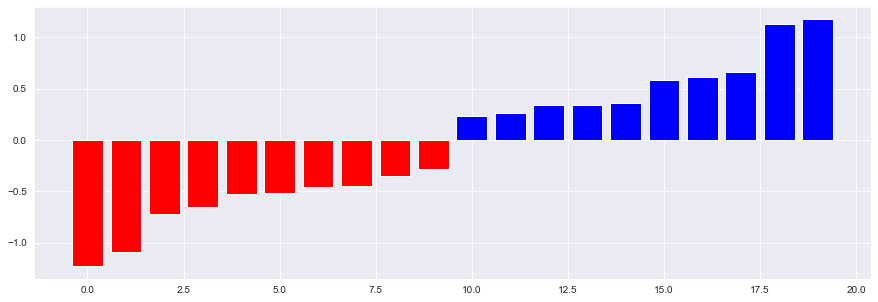

In [101]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
import numpy as np

def plot_coefficients(classifier, feature_names, top_features=10):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    # create plot
    plt.figure(figsize=(15, 5))
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(
        np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right'
    )
    plt.show()

cv = CountVectorizer()
cv.fit(df_test)
print (f'No. of features: {len(cv.vocabulary_)}')
print (cv.get_feature_names())

svm = LinearSVC()
svm.fit(X_train, y_train)
plot_coefficients(svm, cv.get_feature_names())